# Bilbiotecas


In [ ]:
import os
import re
import time
import string
import tempfile
import numpy as np
import pandas as pd
import statistics as st
from collections import Counter
from nltk.sentiment import SentimentIntensityAnalyzer
from datetime import datetime
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from datasets import load_dataset
from symspellpy import SymSpell, Verbosity
import torch
from torch import nn
from transformers import Trainer
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from reportlab.lib.pagesizes import A4
from reportlab.platypus import SimpleDocTemplate, Table, TableStyle, Image
from reportlab.lib import colors
from PIL import Image
from sklearn.metrics import ConfusionMatrixDisplay
import pickle
import emoji
import spacy
import pdfplumber
import fitz  
import contractions
from contractions import fix
from ftfy import fix_text
import wordninja
from deep_translator import GoogleTranslator
from tensorflow.keras.layers import SpatialDropout1D, LSTM, Embedding, Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization, GRU, Bidirectional
from spellchecker import SpellChecker
from nltk import word_tokenize, pos_tag
from nltk.corpus import stopwords, words as nltk_words,  wordnet as wn
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from pywsd.lesk import simple_lesk
from textblob import TextBlob
from sklearn.preprocessing import MinMaxScaler
import nltk
import neattext as nt
from sklearn.utils import resample
import language_tool_python
from transformers import DistilBertTokenizerFast, DistilBertForSequenceClassification
from scipy.stats import spearmanr, pearsonr, skew, kendalltau, norm
from statistics import mode, mean
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
import ast
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, ParameterGrid
from sklearn.metrics import (confusion_matrix, accuracy_score, classification_report,
                             f1_score, precision_score, recall_score, roc_auc_score, make_scorer)
from sklearn.preprocessing import StandardScaler
from sklearn.utils import class_weight, compute_class_weight, compute_sample_weight
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN
from joblib import Parallel, delayed
import joblib
import spacy
from nltk.corpus import stopwords
import neattext.functions as nfx
import torch
from torch.utils.data import DataLoader, Dataset
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
 
from language_tool_python import utils
import optuna
from transformers import (pipeline, RobertaTokenizerFast, RobertaForSequenceClassification,
                          Trainer, TrainingArguments, EarlyStoppingCallback)
from datasets import Dataset
from pyannote.audio import Pipeline as PyannotePipeline
from tkinter import filedialog
from docx import Document
from tqdm import tqdm
import warnings

#!pip install wordcloud
#nltk.download('all')
#nltk.download('stopwords')
#!python -m spacy download pt_core_news_lg
#nltk.download("wordnet")
#nltk.download("averaged_perceptron_tagger")
#nltk.download("punkt")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

Warming up PyWSD (takes ~10 secs)... took 5.722729682922363 secs.


In [2]:
def avaliar_modelo(y_test, pred_test, y_val, pred_val):
    def calcular_metricas(y_true, y_pred):
        return {
            'Accuracy': round(accuracy_score(y_true, y_pred), 4),
            'F1-Score': round(f1_score(y_true, y_pred, average='weighted'), 4),
            'Recall': round(recall_score(y_true, y_pred, average='weighted'), 4),
            'Precision': round(precision_score(y_true, y_pred, average='weighted'), 4)
        }
    test_metrics = calcular_metricas(y_test, pred_test)
    val_metrics = calcular_metricas(y_val, pred_val)
    df_resultados = pd.DataFrame([test_metrics, val_metrics], index=['Teste', 'Validação'])
    return df_resultados

In [3]:
def avaliar_simples(y_test, pred_test):
    def calcular_metricas(y_true, y_pred):
        return {
            'Accuracy': round(accuracy_score(y_true, y_pred), 4),
            'F1-Score': round(f1_score(y_true, y_pred, average='weighted'), 4),
            'Recall': round(recall_score(y_true, y_pred, average='weighted'), 4),
            'Precision': round(precision_score(y_true, y_pred, average='weighted'), 4)
        }
    test_metrics = calcular_metricas(y_test, pred_test)
    df_resultados = pd.DataFrame([test_metrics], index=['Teste'])
    return df_resultados

In [4]:
def grafico(a):
    if a == 1:
        custom_params = {"axes.spines.right": False, "axes.spines.top": False}
        sns.set_theme(style="ticks", rc=custom_params, palette = "pastel")
        palette = "pastel"
    elif a == 2:
        sns.set_theme(style="white", palette = "Set2")
        palette = "Set2"
    elif a == 3:
        sns.set_theme(style="whitegrid", palette = "pastel")
        palette = "pastel"
    elif a == 4:
        sns.set_theme()
        palette = "husl"
    return palette

In [5]:
sym_spell = SymSpell(max_dictionary_edit_distance=2)
sym_spell.load_dictionary("Recursos/frequency_dictionary_en_82_765.txt", term_index=0, count_index=1)
def corrigir_symspell(texto):
    corrected = []
    for word in texto.split():
        suggestions = sym_spell.lookup(word, Verbosity.CLOSEST, max_edit_distance=2)
        if suggestions:
            corrected.append(suggestions[0].term)
        else:
            corrected.append(word)
    return ' '.join(corrected)

# Tratamento de dados

In [26]:
data = pd.read_csv(r"Dataset\AffectAlchemytest2.csv", encoding='ISO-8859-1')
data

,Text,Emotion,en
0,Each day brought with it new challenges as the...,Grief,en
1,Each day brought with it new challenges as the...,Grief,en
2,Each day brought with it new challenges as the...,Grief,en
3,Each day felt heavier than the last as they st...,Grief,en
4,"Every corner of the room reminded him of her,...",Grief,en
...,...,...,...
20070,"So all the m&m's eaten, house neatly decorated...",Surprise,en
20071,"Son is back home, I still have to wrap a prese...",Surprise,en
20072,Son made a super cool one. Can't put it on Twi...,Surprise,en
20073,"So the Sinterklaas presents have been bought, ...",Surprise,en


Vamos verificar a distribuição de observação de acordo com os nossos labels da variável alvo

In [27]:
data["Emotion"].value_counts()

Emotion
Joy                1723
Sad                1577
Fear               1490
Happy              1324
Surprise           1297
Neutral            1214
Peace              1132
Determination      1058
Anger              1043
Gratitude          1030
Disgust            1028
Contempt           1011
Love               1005
Anticipation        969
Awe                 969
Optimism            759
Trust               625
Shame               572
Grief               233
sadness               3
love                  3
Shame, Sad            2
Gratitude, Love       2
fear                  2
surprise              2
Peace, Joy            1
Shame, Fear           1
Name: count, dtype: int64

Vamos criar uma coluna com o nome das emoções para podermos apresentar os gráficos com as emoções corretas como referido [anteriormente](#secao6)

In [28]:
data.loc[:,'Emotion'] = data['Emotion'].replace({'Sad': 'Sadness', 'sadness': 'Sadness',
                                           'Fear': 'Fear', 'fear': 'Fear', 'Happy': 'Happiness',
                                           'Surprise': 'Surprise', 'surprise': 'Surprise', "love": "Love"})
data["Emotion"].value_counts()

Emotion
Joy                1723
Sadness            1580
Fear               1492
Happiness          1324
Surprise           1299
Neutral            1214
Peace              1132
Determination      1058
Anger              1043
Gratitude          1030
Disgust            1028
Contempt           1011
Love               1008
Anticipation        969
Awe                 969
Optimism            759
Trust               625
Shame               572
Grief               233
Gratitude, Love       2
Shame, Sad            2
Shame, Fear           1
Peace, Joy            1
Name: count, dtype: int64

In [29]:
emocoeslist = { "Joy", "Disgust", "Anger", "Fear","Trust", "Surprise","Anticipation", "Sadness"}
data = data[data['Emotion'].isin(emocoeslist)]
data["Emotion"].value_counts()

Emotion
Joy             1723
Sadness         1580
Fear            1492
Surprise        1299
Anger           1043
Disgust         1028
Anticipation     969
Trust            625
Name: count, dtype: int64

C:\Users\garci\AppData\Local\Temp\ipykernel_11560\1215207054.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Emotion", data=data,order= data['Emotion'].value_counts().index,palette="husl")


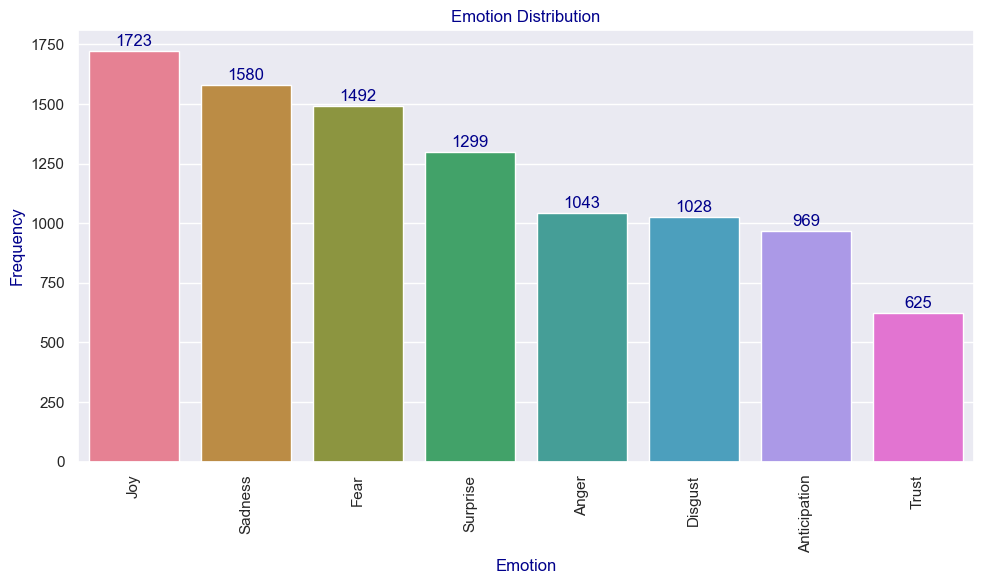

In [30]:
grafico(4)
plt.figure(figsize=(10, 6), dpi=100)
sns.countplot(x="Emotion", data=data,order= data['Emotion'].value_counts().index,palette="husl")
plt.xlabel('Emotion', color="Darkblue")
plt.xticks(rotation=90)
plt.ylabel('Frequency', color='Darkblue')
plt.title('Emotion Distribution', color='Darkblue')
for i, value in enumerate(data['Emotion'].value_counts()):
    plt.text(i, value+20, str(value),ha='center',color='Darkblue')
plt.tight_layout()
plt.show() 

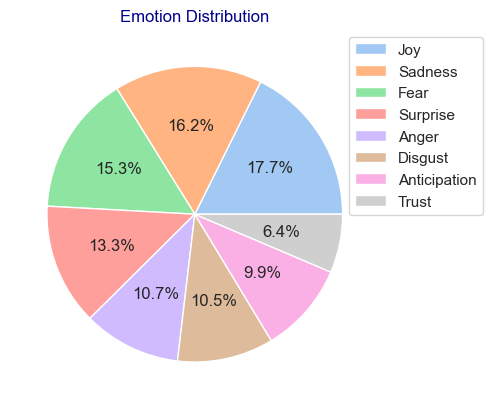

In [31]:
grafico(3)
plt.pie(data['Emotion'].value_counts(), autopct='%1.1f%%')
plt.title('Emotion Distribution', color='Darkblue')
plt.legend(data['Emotion'].value_counts().index, loc='upper right', bbox_to_anchor=(1.3, 1))

In [32]:
pd.DataFrame({'V. Absolutos':data['Emotion'].value_counts(),'V. Relativos (%)':(data['Emotion'].value_counts()*100/data.shape[0]).round(2)})

,V. Absolutos,V. Relativos (%)
Emotion,,
Joy,1723,17.66
Sadness,1580,16.19
Fear,1492,15.29
Surprise,1299,13.31
Anger,1043,10.69
Disgust,1028,10.53
Anticipation,969,9.93
Trust,625,6.40


In [33]:
textounico = ' '.join(map(str, data['Text']))
len(textounico)

865894

In [34]:
nlp = spacy.load("en_core_web_lg")
chunk_size = 1000000
chunks = [textounico[i:i + chunk_size] for i in range(0, len(textounico), chunk_size)]
words = []
for chunk in chunks:
    doc = nlp(chunk)
    words.extend([token.lemma_ for token in doc if not token.is_stop and token.is_alpha])
print(f"Total de palavras processadas: {len(words)}")

Total de palavras processadas: 69818


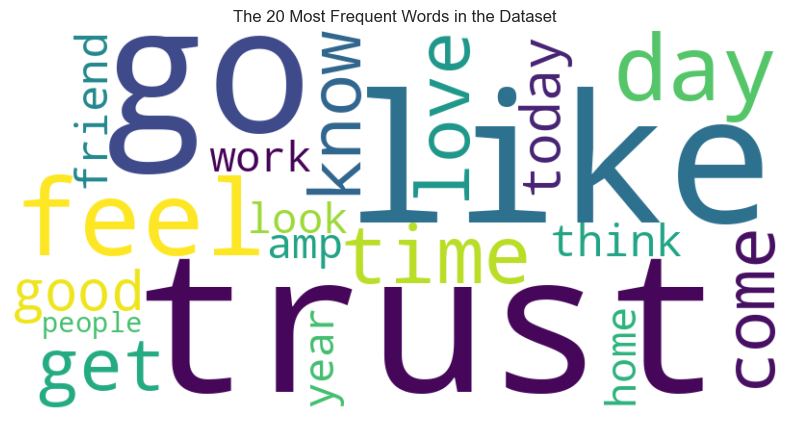

In [35]:
word_frequencies = Counter(words)
top_10_words = dict(word_frequencies.most_common(20))
wordcloud = WordCloud(width=800, height=400, background_color="white", colormap="viridis").generate_from_frequencies(top_10_words)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("The 20 Most Frequent Words in the Dataset")
plt.show()

In [36]:
chunk_size = 1000000
entity_counts = Counter()
chunks = [textounico[i:i + chunk_size] for i in range(0, len(textounico), chunk_size)]
words = []
for chunk in chunks:
    doc = nlp(chunk)
    for ent in doc.ents:
        entity_counts[ent.label_] += 1
total_entities = sum(entity_counts.values())
entity_percentages = {ent: (count / total_entities) * 100 for ent, count in entity_counts.items()}

In [37]:
dfentitycounts = pd.DataFrame.from_dict(entity_counts, orient='index', columns=['Valores Absolutos'])
total = dfentitycounts['Valores Absolutos'].sum()
dfentitycounts['Valores Relativos (%)'] = (dfentitycounts['Valores Absolutos'] / total) * 100
dfentitycounts.round(2)

,Valores Absolutos,Valores Relativos (%)
CARDINAL,1241,16.98
ORG,943,12.91
PERSON,1423,19.47
NORP,182,2.49
TIME,596,8.16
WORK_OF_ART,191,2.61
DATE,1681,23.01
ORDINAL,233,3.19
GPE,442,6.05
LOC,38,0.52


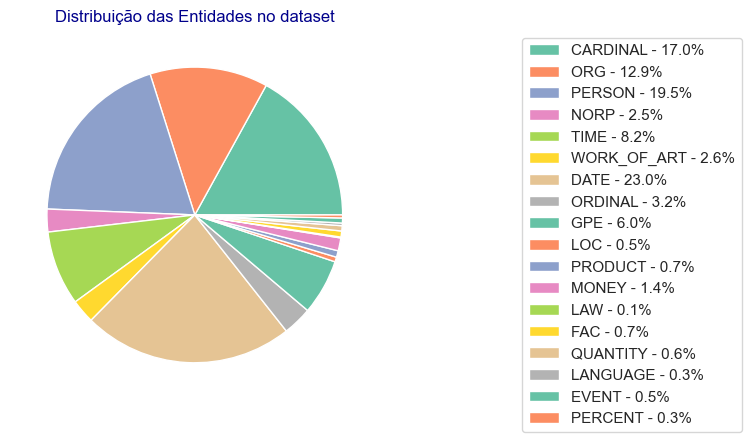

In [38]:
grafico(2)
plt.pie(dfentitycounts['Valores Relativos (%)'])
plt.title('Distribuição das Entidades no dataset', color='Darkblue')
labels = [f"{entidade} - {percent:.1f}%" for entidade, percent in zip(dfentitycounts.index, dfentitycounts['Valores Relativos (%)'])]
plt.legend(labels, loc='upper right', bbox_to_anchor=(2, 1))


In [39]:
sentimento = TextBlob(textounico).sentiment
sentimento

Sentiment(polarity=0.06890813526169688, subjectivity=0.5448952760303835)

In [40]:
print("O nosso dataset é composto por ",data.shape[0]," linhas e",data.shape[1]," colunas")

O nosso dataset é composto por  9759  linhas e 3  colunas


In [14]:
nlp = spacy.load("en_core_web_lg")
stop_words = set(stopwords.words('english'))
sia = SentimentIntensityAnalyzer()
def enrich_text_pipeline(text):
    if not isinstance(text, str):
        return {"text": "", "ner": [], "pos": [], "sentiment": 0.0}
    try:
        text = nfx.remove_userhandles(text.lower().strip())
        text = nfx.remove_urls(text)
        text = nfx.remove_stopwords(text)
        text = nfx.remove_puncts(text)
        
        doc = nlp(text)
        tokens = [
            token.lemma_.lower()
            for token in doc
            if token.is_alpha and token.lemma_.lower() not in stop_words
        ]
        cleaned_text = ' '.join(tokens)
        named_entities = [(ent.text, ent.label_) for ent in doc.ents]
        pos_tags = [(token.text, token.pos_) for token in doc]
        sentiment = sia.polarity_scores(cleaned_text)['compound']

        return {
            "text": cleaned_text,
            "ner": named_entities,
            "pos": pos_tags,
            "sentiment": sentiment
        }

    except Exception as e:
        print(f"[Erro] {e}")
        return {"text": "", "ner": [], "pos": [], "sentiment": 0.0}

In [13]:
def anonymize_selected_entities(text):
    doc = nlp(text)
    new_tokens = []
    entidades_a_remover = {"CARDINAL", "ORG", "PERSON", "DATE"}
    last_idx = 0
    for ent in doc.ents:
        if ent.label_ in entidades_a_remover:
            new_tokens.append(text[last_idx:ent.start_char])
            last_idx = ent.end_char  
    new_tokens.append(text[last_idx:]) 
    return ''.join(new_tokens)

In [12]:
valid_words = set(nltk_words.words())
def reduce_excessive_repeats_smart(text):
    def reduce_word(word):
        if word.lower() in valid_words:
            return word
        return re.sub(r'(.)\1{2,}', r'\1\1', word)
    return ' '.join(reduce_word(w) for w in text.split())


In [11]:
def remove_repeated_words(text):
    return re.sub(r'\b(\w+)(\s+\1\b)+', r'\1', text, flags=re.IGNORECASE)

In [10]:
def clean_text_spacy(text, additional_stopwords=set()):
    doc = nlp(text)
    tokens = [
        token.lemma_ for token in doc
        if not token.is_stop       
        and not token.is_punct            
        and not token.like_num               
        and token.text.lower() not in additional_stopwords
    ]
    return ' '.join(tokens)


In [9]:
def split_hashtag(hashtag):
    hashtag_body = hashtag[1:]
    if any(c.isupper() for c in hashtag_body):
        split_text = re.sub(r'(?<=[a-z])(?=[A-Z])', ' ', hashtag_body)
        return split_text.lower()
    else:
        split_words = wordninja.split(hashtag_body)
        return " ".join(split_words)
def process_text(text):
    processed_words = []
    for word in text.split():
        if word.startswith('#'):
            processed_words.append(split_hashtag(word))
        else:
            processed_words.append(word)
    return ' '.join(processed_words)

In [8]:
def corrigir_erros_comuns(text):
    correcoes = {
        "luv": "love",
        "gr8": "great",
        "ur": "your",
        "u": "you",
        "r": "are",
        "ya": "you",
        "im": "i am",
        "dont": "do not",
        "cant": "cannot",
        "wont": "will not",
        "idk": "i do not know",
        "omg": "oh my god",
        "omfg": "oh my fucking god",
        "wtf": "what the fuck",
        "lmao": "laughing my ass off",
        "lol": "laughing out loud",
        "tho": "though",
        "thx": "thanks",
        "pls": "please",
        "bf":"boyfriend",
        "ikr" : "i know right",
        "plz": "please",
        "gonna": "going to",
        "wanna": "want to",
        "gotta": "got to",
        "ain't": "is not",
        "cuz": "because",
        "n":"and",
        "r":"are",
        "bc": "because",
        "b4": "before",
        "btw": "by the way",
        "omw": "on my way",
        "kinda": "kind of",
        "dis":"this",
        "idk": "i do not know",
        "gf":"girlfriend",
        "gimme":"give me",
        "lemme": "let me",
        "gimme": "give me",
        "txt":"text",
        "nigga":"nigger",
        "wut":"what",
        "tn":"tonight",
        "awk":"awkward",
        "wit":"whit",
        "dis":"this",
        "smh": "shaking my head",
        "tbh": "to be honest",
        "nah":"no",
        "yeah":"yes",
        "fb":"Facebook",
        "eva":"ever",
        "OML":"oh my lord",
        "nite" : "night ",
        "ew":"so disgusting",
        "fml": "for mother loard",
        "bout":"about",
        "imma":"I am going to",
        "fuk": "fuck",
        "fukin": "fucking",
        "smdh":"Shaking my damn head",
        "iv":"  have",
        "fuking": "fucking",
        "lvl":"level",
        "smmfh":"Shaking my fucking head",
        "rip":"rest in peace",
        "smfh":"Shaking my fucking head",
        "lvs":"levels",
        "fuckin": "fucking",
        "dat":"that",
        "ppl":"people",
        "bc":"because",
        "nigga":"nigger",
        "ya'll": "you all",
        "da":"the",
        "yall": "you all",
        "coz": "because",
        "brb": "be right back",
        "jk":"joking",
        "gtg":"got to go",
        "otha": "other",
        "gtf":"Get the fuck out",
        "talkin":"talking",
        "lil":"little",
        "&":"and",
        "smh":"shaking my head",
        "ma":"my",
        "afk": "away from keyboard",
        "str8":"straight",
        "tyvm":"thank you very much",
        "wit":"with",
        "tldr": "too long didn't read",
        "tonite":"tonight",
        "ikr": "i know right",
        "kno":"know",
        "bou":"about",
        "xmas":"Christmas",
        "hw":"Homework",
        "tv":"television",
        "Brb":"be right back",
        "sat": "saturday",
        "wat":"what",
        "dm": "direct message"
    }
    for errado, certo in correcoes.items():
        text = re.sub(rf'\b{re.escape(errado)}\b', certo, text)
        return text
    

In [7]:
def substituir_emojis(text):
    return emoji.demojize(text, delimiters=(" ", " "))

In [6]:
def remove_low_tfidf_words(texts, threshold=0.01):
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(texts)
    feature_names = vectorizer.get_feature_names_out()   
    cleaned_texts = []
    for doc_index, doc in enumerate(texts):
        tfidf_scores = tfidf_matrix[doc_index].toarray().flatten()
        doc_words = doc.split()
        word_tfidf = dict(zip(feature_names, tfidf_scores))
        filtered_words = [word for word in doc_words if word in word_tfidf and word_tfidf[word] >= threshold]       
        cleaned_texts.append(' '.join(filtered_words))
    return cleaned_texts

In [50]:
data.to_csv("Dataset\\dataset_Plutchik_paracorrigir.csv", index=False, encoding='ISO-8859-1')


In [15]:
data = pd.read_csv("Dataset\\dataset_Plutchik_paracorrigir.csv", encoding='ISO-8859-1')
data

,Text,Emotion,en
0,- great time to think about how to make to our...,Fear,en
1,--- she does wat she want to prove to bitches....,Joy,en
2,- Those damn hoes in Tyga's video just upset m...,Disgust,en
3,Trust is the beacon that guides us through the...,Trust,en
4,Trust is the bond that binds individuals toget...,Trust,en
...,...,...,...
9754,"So all the m&m's eaten, house neatly decorated...",Surprise,en
9755,"Son is back home, I still have to wrap a prese...",Surprise,en
9756,Son made a super cool one. Can't put it on Twi...,Surprise,en
9757,"So the Sinterklaas presents have been bought, ...",Surprise,en


In [ ]:
#data.loc[:, 'cleaned_text'] = data['cleaned_text'].apply(corrigir_symspell)
#data.loc[:, 'cleaned_text'] = data['cleaned_text'].astype(str).str.lower()
#data.loc[:, 'cleaned_text'] = data['cleaned_text'].str.replace(r'&quot;.*?&quot;', '', regex=True)
#data.loc[:, 'cleaned_text'] = data['cleaned_text'].apply(process_text)
#data.loc[:, 'cleaned_text'] = data['cleaned_text'].apply(fix_text)
#data.loc[:, 'cleaned_text'] = data['cleaned_text'].apply(fix)
#data.loc[:, 'cleaned_text'] = data['cleaned_text'].str.replace(r'\bÃ[\wÂ¢â€™“”]+\b', '', regex=True, case=False)
#data.loc[:, 'cleaned_text'] = data['cleaned_text'].str.replace(r'Ã¢Â¬Ã¢Â¬', '', regex=True, case=False)
#data.loc[:, 'cleaned_text'] = data['cleaned_text'].str.replace(r'\s+', ' ', regex=True).str.strip()
#data.loc[:, 'cleaned_text'] = data['cleaned_text'].str.replace(r'mÃ¬ Ã¬Â²Ã¬Â¶Ã®ÂµÃ¬Â²Ã¬Â£', '', regex=True, case=False)
#data.loc[:, 'cleaned_text'] = data['cleaned_text'].str.replace(r'Ã©', 'é', regex=True, case=False)
#data.loc[:, 'cleaned_text'] = data['cleaned_text'].str.replace(r'Ã®', 'î', regex=True, case=False)
#data.loc[:, 'cleaned_text'] = data['cleaned_text'].str.replace(r'\b&amp\b', ' ', regex=True)
#data.loc[:, 'cleaned_text'] = data['cleaned_text'].str.replace(r'\S+@\S+', ' ', regex=True)
#data.loc[:, 'cleaned_text'] = data['cleaned_text'].str.replace(r'@\S+', ' ', regex=True)
#data.loc[:, 'cleaned_text'] = data['cleaned_text'].str.replace(r'http\S+|https\S+|www\S+', ' ', regex=True)
#data.loc[:, 'cleaned_text'] = data['cleaned_text'].apply(anonymize_selected_entities)

In [ ]:
nlp = spacy.load("en_core_web_lg")
stop_words = set(stopwords.words('english'))
tqdm.pandas()
data['enriched'] = data['Text'].progress_apply(enrich_text_pipeline)
data['cleaned_text'] = data['enriched'].apply(lambda x: x['text'])
data['sentiment'] = data['enriched'].apply(lambda x: x['sentiment'])
data['entities'] = data['enriched'].apply(lambda x: x['ner'])
data['pos_tags'] = data['enriched'].apply(lambda x: x['pos'])
data.loc[:, 'cleaned_text'] = data['cleaned_text'].apply(substituir_emojis)
data.loc[:, 'cleaned_text'] = data['cleaned_text'].apply(lambda x: contractions.fix(x))
data.loc[:, 'cleaned_text'] = data['cleaned_text'].str.replace(r'\d+',  ' ', regex=True)
data.loc[:, 'cleaned_text'] = data['cleaned_text'].apply(corrigir_erros_comuns)
data.loc[:, 'cleaned_text'] = data['cleaned_text'].apply(reduce_excessive_repeats_smart)
data.loc[:, 'cleaned_text'] = data['cleaned_text'].apply(remove_repeated_words)
data.loc[:, 'cleaned_text'] = data['cleaned_text'].apply(lambda x: clean_text_spacy(x, additional_stopwords={'rt','amp', 'rhoa', 'lol', 'omfg'}))
data.loc[:, 'cleaned_text'] = remove_low_tfidf_words(data['cleaned_text'], threshold=0.01)
data.loc[:, 'cleaned_text'] = data['cleaned_text'].apply(lambda x: re.sub(f"[{re.escape(string.punctuation)}]", " ", x))
data.loc[:, 'tokens'] = data['cleaned_text'].apply(word_tokenize)
data

In [ ]:
emocoeslist = { "Joy":0, "Disgust":1, "Anger":2, "Fear":3,"Trust":4, "Surprise":5,"Anticipation":6, "Sadness":7}
data = data.drop(columns=['en'])
data['Emotion_num'] = data['Emotion'].map(emocoeslist)
data = data[data['Text'].str.strip() != ""]
data = data[data['cleaned_text'].str.strip() != ""]
data = data[data['Text'].str.split().apply(len) > 1]
data = data[data['cleaned_text'].str.split().apply(len) > 1]
data = data.drop_duplicates(subset='Text').reset_index(drop=True)
data = data.drop_duplicates(subset='cleaned_text').reset_index(drop=True)
data

,Text,Emotion,enriched,cleaned_text,sentiment,entities,pos_tags,tokens,Emotion_num
0,- great time to think about how to make to our...,Fear,"{'text': 'great time think world amp free', 'n...",great time think world free,0.8126,[],"[( , SPACE), (great, ADJ), (time, NOUN), (thin...","[great, time, think, world, free]",3
1,--- she does wat she want to prove to bitches....,Joy,{'text': 'wat want prove bitch dnt want wat u ...,wat want prove bitch dnt want wat matter hw dr...,-0.2500,[],"[( , SPACE), (wat, NOUN), (want, VERB), (prove...","[wat, want, prove, bitch, dnt, want, wat, matt...",0
2,- Those damn hoes in Tyga's video just upset m...,Disgust,{'text': 'damn hoe tygas video upset hope vide...,damn hoe tygas video upset hope video worth,-0.1280,[],"[( , SPACE), (damn, ADJ), (hoes, NOUN), (tygas...","[damn, hoe, tygas, video, upset, hope, video, ...",1
3,Trust is the beacon that guides us through the...,Trust,"{'text': 'trust beacon guide dark night', 'ner...",trust beacon guide dark night,0.5106,[],"[(trust, NOUN), (beacon, NOUN), (guides, VERB)...","[trust, beacon, guide, dark, night]",4
4,Trust is the bond that binds individuals toget...,Trust,{'text': 'trust bond bind individual tapestry ...,trust bond bind individual tapestry love,0.8176,[],"[(trust, NOUN), (bond, NOUN), (binds, VERB), (...","[trust, bond, bind, individual, tapestry, love]",4
...,...,...,...,...,...,...,...,...,...
9386,"So all the m&m's eaten, house neatly decorated...",Surprise,{'text': 'mms eat house neatly decorate neat s...,mms eat house neatly decorate neat shower dres...,0.8750,"[(mms, ORG)]","[(mms, PROPN), (eaten, VERB), (house, NOUN), (...","[mms, eat, house, neatly, decorate, neat, show...",5
9387,"Son is back home, I still have to wrap a prese...",Surprise,"{'text': 'son home wrap present print poem', '...",son home wrap present print poem,0.0000,"[(son home wrap, ORG)]","[(son, PROPN), (home, PROPN), (wrap, PROPN), (...","[son, home, wrap, present, print, poem]",5
9388,Son made a super cool one. Can't put it on Twi...,Surprise,{'text': 'son super cool one twitter though re...,son super cool twitter reason surprise anymore,0.8074,[],"[(son, NOUN), (super, ADV), (cool, ADJ), (one,...","[son, super, cool, twitter, reason, surprise, ...",5
9389,"So the Sinterklaas presents have been bought, ...",Surprise,{'text': 'sinterklaas present buy write poem s...,sinterklaas present buy write poem sinterklaas...,0.3612,"[(sinterklaas presents, PERSON), (sinterklaas ...","[(sinterklaas, NOUN), (presents, NOUN), (bough...","[sinterklaas, present, buy, write, poem, sinte...",5


C:\Users\garci\AppData\Local\Temp\ipykernel_11560\1215207054.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Emotion", data=data,order= data['Emotion'].value_counts().index,palette="husl")


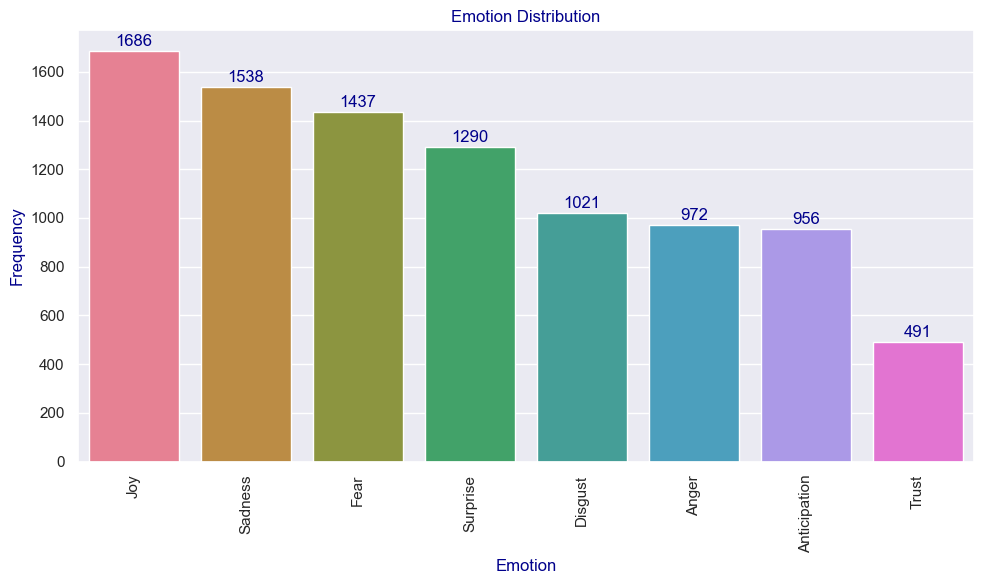

In [ ]:
grafico(4)
plt.figure(figsize=(10, 6), dpi=100)
sns.countplot(x="Emotion", data=data,order= data['Emotion'].value_counts().index,palette="husl")
plt.xlabel('Emotion', color="Darkblue")
plt.xticks(rotation=90)
plt.ylabel('Frequency', color='Darkblue')
plt.title('Emotion Distribution', color='Darkblue')
for i, value in enumerate(data['Emotion'].value_counts()):
    plt.text(i, value+20, str(value),ha='center',color='Darkblue')
plt.tight_layout()
plt.show() 

In [82]:
textounico = ' '.join(data['cleaned_text'])
len(textounico)

438248

In [83]:
nlp = spacy.load("en_core_web_lg", disable=["ner","parser"])
chunk_size = 1000000
chunks = [textounico[i:i + chunk_size] for i in range(0, len(textounico), chunk_size)]
words2 = []
for chunk in chunks:
    doc = nlp(chunk)
    words2.extend([token.lemma_ for token in doc if not token.is_stop and token.is_alpha and token.ent_type_ == ""])
print(f"Total de palavras processadas: {len(words2)}")

Total de palavras processadas: 64933


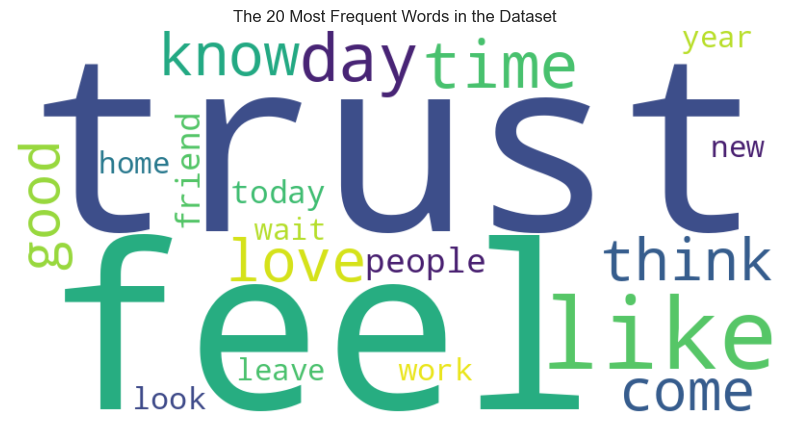

In [84]:
word_frequencies = Counter(words2)
top_20_words = dict(word_frequencies.most_common(20))
wordcloud = WordCloud(width=800, height=400, background_color="white", colormap="viridis").generate_from_frequencies(top_20_words)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("The 20 Most Frequent Words in the Dataset")
plt.show()

In [85]:
sentimento = TextBlob(textounico).sentiment
sentimento

Sentiment(polarity=0.034351902955706164, subjectivity=0.5774143672127644)

In [86]:
data.to_csv("Dataset\\datasetlimpoPlutchik.csv", index=False)


In [16]:
data = pd.read_csv("Dataset\\datasetlimpoPlutchik.csv")
data

,Text,Emotion,enriched,cleaned_text,sentiment,entities,pos_tags,tokens,Emotion_num
0,- great time to think about how to make to our...,Fear,"{'text': 'great time think world amp free', 'n...",great time think world free,0.8126,[],"[(' ', 'SPACE'), ('great', 'ADJ'), ('time', 'N...","['great', 'time', 'think', 'world', 'free']",3
1,--- she does wat she want to prove to bitches....,Joy,{'text': 'wat want prove bitch dnt want wat u ...,wat want prove bitch dnt want wat matter hw dr...,-0.2500,[],"[(' ', 'SPACE'), ('wat', 'NOUN'), ('want', 'VE...","['wat', 'want', 'prove', 'bitch', 'dnt', 'want...",0
2,- Those damn hoes in Tyga's video just upset m...,Disgust,{'text': 'damn hoe tygas video upset hope vide...,damn hoe tygas video upset hope video worth,-0.1280,[],"[(' ', 'SPACE'), ('damn', 'ADJ'), ('hoes', 'NO...","['damn', 'hoe', 'tygas', 'video', 'upset', 'ho...",1
3,Trust is the beacon that guides us through the...,Trust,"{'text': 'trust beacon guide dark night', 'ner...",trust beacon guide dark night,0.5106,[],"[('trust', 'NOUN'), ('beacon', 'NOUN'), ('guid...","['trust', 'beacon', 'guide', 'dark', 'night']",4
4,Trust is the bond that binds individuals toget...,Trust,{'text': 'trust bond bind individual tapestry ...,trust bond bind individual tapestry love,0.8176,[],"[('trust', 'NOUN'), ('bond', 'NOUN'), ('binds'...","['trust', 'bond', 'bind', 'individual', 'tapes...",4
...,...,...,...,...,...,...,...,...,...
9386,"So all the m&m's eaten, house neatly decorated...",Surprise,{'text': 'mms eat house neatly decorate neat s...,mms eat house neatly decorate neat shower dres...,0.8750,"[('mms', 'ORG')]","[('mms', 'PROPN'), ('eaten', 'VERB'), ('house'...","['mms', 'eat', 'house', 'neatly', 'decorate', ...",5
9387,"Son is back home, I still have to wrap a prese...",Surprise,"{'text': 'son home wrap present print poem', '...",son home wrap present print poem,0.0000,"[('son home wrap', 'ORG')]","[('son', 'PROPN'), ('home', 'PROPN'), ('wrap',...","['son', 'home', 'wrap', 'present', 'print', 'p...",5
9388,Son made a super cool one. Can't put it on Twi...,Surprise,{'text': 'son super cool one twitter though re...,son super cool twitter reason surprise anymore,0.8074,[],"[('son', 'NOUN'), ('super', 'ADV'), ('cool', '...","['son', 'super', 'cool', 'twitter', 'reason', ...",5
9389,"So the Sinterklaas presents have been bought, ...",Surprise,{'text': 'sinterklaas present buy write poem s...,sinterklaas present buy write poem sinterklaas...,0.3612,"[('sinterklaas presents', 'PERSON'), ('sinterk...","[('sinterklaas', 'NOUN'), ('presents', 'NOUN')...","['sinterklaas', 'present', 'buy', 'write', 'po...",5


In [17]:
data = data.dropna()
data = data.drop_duplicates(subset='cleaned_text', keep='first').reset_index(drop=True)
data = data[data['Text'].str.split().apply(len) > 1]
data

,Text,Emotion,enriched,cleaned_text,sentiment,entities,pos_tags,tokens,Emotion_num
0,- great time to think about how to make to our...,Fear,"{'text': 'great time think world amp free', 'n...",great time think world free,0.8126,[],"[(' ', 'SPACE'), ('great', 'ADJ'), ('time', 'N...","['great', 'time', 'think', 'world', 'free']",3
1,--- she does wat she want to prove to bitches....,Joy,{'text': 'wat want prove bitch dnt want wat u ...,wat want prove bitch dnt want wat matter hw dr...,-0.2500,[],"[(' ', 'SPACE'), ('wat', 'NOUN'), ('want', 'VE...","['wat', 'want', 'prove', 'bitch', 'dnt', 'want...",0
2,- Those damn hoes in Tyga's video just upset m...,Disgust,{'text': 'damn hoe tygas video upset hope vide...,damn hoe tygas video upset hope video worth,-0.1280,[],"[(' ', 'SPACE'), ('damn', 'ADJ'), ('hoes', 'NO...","['damn', 'hoe', 'tygas', 'video', 'upset', 'ho...",1
3,Trust is the beacon that guides us through the...,Trust,"{'text': 'trust beacon guide dark night', 'ner...",trust beacon guide dark night,0.5106,[],"[('trust', 'NOUN'), ('beacon', 'NOUN'), ('guid...","['trust', 'beacon', 'guide', 'dark', 'night']",4
4,Trust is the bond that binds individuals toget...,Trust,{'text': 'trust bond bind individual tapestry ...,trust bond bind individual tapestry love,0.8176,[],"[('trust', 'NOUN'), ('bond', 'NOUN'), ('binds'...","['trust', 'bond', 'bind', 'individual', 'tapes...",4
...,...,...,...,...,...,...,...,...,...
9386,"So all the m&m's eaten, house neatly decorated...",Surprise,{'text': 'mms eat house neatly decorate neat s...,mms eat house neatly decorate neat shower dres...,0.8750,"[('mms', 'ORG')]","[('mms', 'PROPN'), ('eaten', 'VERB'), ('house'...","['mms', 'eat', 'house', 'neatly', 'decorate', ...",5
9387,"Son is back home, I still have to wrap a prese...",Surprise,"{'text': 'son home wrap present print poem', '...",son home wrap present print poem,0.0000,"[('son home wrap', 'ORG')]","[('son', 'PROPN'), ('home', 'PROPN'), ('wrap',...","['son', 'home', 'wrap', 'present', 'print', 'p...",5
9388,Son made a super cool one. Can't put it on Twi...,Surprise,{'text': 'son super cool one twitter though re...,son super cool twitter reason surprise anymore,0.8074,[],"[('son', 'NOUN'), ('super', 'ADV'), ('cool', '...","['son', 'super', 'cool', 'twitter', 'reason', ...",5
9389,"So the Sinterklaas presents have been bought, ...",Surprise,{'text': 'sinterklaas present buy write poem s...,sinterklaas present buy write poem sinterklaas...,0.3612,"[('sinterklaas presents', 'PERSON'), ('sinterk...","[('sinterklaas', 'NOUN'), ('presents', 'NOUN')...","['sinterklaas', 'present', 'buy', 'write', 'po...",5


In [18]:
for col in ['Text', 'enriched', 'entities', "cleaned_text",'pos_tags', 'tokens',"sentiment" ]:
    data[col] = data[col].apply(lambda x: " ".join(str(i) for i in x) if isinstance(x, list) else str(x))


In [19]:
y = data["Emotion_num"].reset_index(drop=True)
X = data.drop(columns=["Emotion", "Emotion_num"]).reset_index(drop=True)

In [ ]:
#X = data['cleaned_text']
#y= data['Emotion_num']
#X = X.reset_index(drop=True)  
#y = y.reset_index(drop=True)
#print(X.iloc[0])
#print(y[0])

great time think world free
4


In [10]:
with open('Recursos\\XPlutchik.pickle','wb') as f:
    pickle.dump(X,f)
    
with open('Recursos\\yPlutchik.pickle','wb') as f:
    pickle.dump(y,f)

# Models


<center>

### Regressão Logistica

</center>

- [X] [Preparação dos Dados](#secao52)
    - [X] [Escolha de Técnicas de modelação](#secao521)
      - [ ] [Decision Tree](#secao999)
      - [ ] [Random Forest](#secao998)
      - [ ] [XGBoost](#secao997)
      - [ ] [K-Nearest Neighbors](#secao996)
      - [ ] [SVM](#secao995)
      - [X] **[Regressão logística](#secao994)**
      - [ ] [Naive Bayes](#secao993)
      - [ ] [CNN (com pré treino FastText)](#secao993)

In [ ]:
#X = data['cleaned_text']
#y= data['Emotion_num']

In [293]:
preprocessor = ColumnTransformer(transformers=[
    ('cleaned_text', TfidfVectorizer(max_features = 7000,max_df=0.3, min_df=2, ngram_range=(1,2)), 'cleaned_text'),
    ("Text", TfidfVectorizer(max_features = 7000, max_df=0.3, min_df=2, ngram_range=(1,2)),"Text"),
    ("enriched", TfidfVectorizer(max_features = 7000, max_df=0.3, min_df=2, ngram_range=(1,2)), "enriched"),
    ("entities", TfidfVectorizer(max_features = 7000, max_df=0.3, min_df=2, ngram_range=(1,2)), "entities"),
    ("pos_tags",TfidfVectorizer(max_features = 7000, max_df=0.3, min_df=2, ngram_range=(1,2)),"pos_tags"),
    ("tokens",TfidfVectorizer(max_features = 7000, max_df=0.3, min_df=2, ngram_range=(1,2)),"tokens"),
    ('num', StandardScaler(), ['sentiment'])
])
param_grid = {
    'classifier__C': [0.1, 1, 10],
    'classifier__solver': ['lbfgs'],
    'classifier__penalty': ['l2'],
}
pipeline = Pipeline([('vectorizer', preprocessor),('classifier', LogisticRegression(random_state=42,max_iter=1000))])
grid_search = GridSearchCV(pipeline,param_grid, scoring='f1_weighted', cv=5, n_jobs=-1)
grid_search.fit(X, y)
print("Melhores Parâmetros:", grid_search.best_params_)
print("Melhor F1-Score:", grid_search.best_score_)

Melhores Parâmetros: {'classifier__C': 1, 'classifier__penalty': 'l2', 'classifier__solver': 'lbfgs'}
Melhor F1-Score: 0.5541071321698995


In [294]:
#vectorizer = TfidfVectorizer(max_features = 7000, min_df = 1, max_df = 0.9,ngram_range=(1,1))
vectorizer=preprocessor
X = vectorizer.fit_transform(X).toarray()
joblib.dump(vectorizer, 'Parte1/EmotionFromText/vectorizerRL_Plutchik.joblib')

['Parte1/EmotionFromText/vectorizerRL_Plutchik.joblib']

In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.40, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp)

In [ ]:
#param_grid = {
#    'C': [0.1, 1, 10],
#    'penalty': ['l2'],
#    'solver': ['lbfgs', 'saga'],
#    'max_iter': [500, 1000]
#}

#all_params = list(ParameterGrid(param_grid))
#total = len(all_params)
#best_score = -np.inf
#best_params = None

#start = time.time()
#pbar = tqdm(total=total, desc="GridSearch Progress")

#for params in all_params:
#    try:
#        model = LogisticRegression(random_state=42, **params)
#        scores = cross_val_score(model, X_train, y_train, cv=5, scoring='f1_weighted', n_jobs=-1)
#        mean_score = scores.mean()

#        if mean_score > best_score:
#            best_score = mean_score
#            best_params = params

#    except Exception as e:
#        print(f"Erro com params {params}: {e}")

#    pbar.update(1)

#pbar.close()
#end = time.time()

#print("Melhores Parâmetros:", best_params)
#print("Melhor F1 ponderado:", best_score)

In [ ]:
classifier = LogisticRegression(C=1,
                                solver='saga',
                                max_iter=500,
                                class_weight='balanced',
                                random_state = 42,
                                penalty='l2')
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
y_pred2 = classifier.predict(X_val)

In [ ]:
joblib.dump(classifier, 'Parte1/EmotionFromText/logistic_regression_model_Plutchik.joblib')

['Parte1/EmotionFromText/logistic_regression_model_Plutchik.joblib']

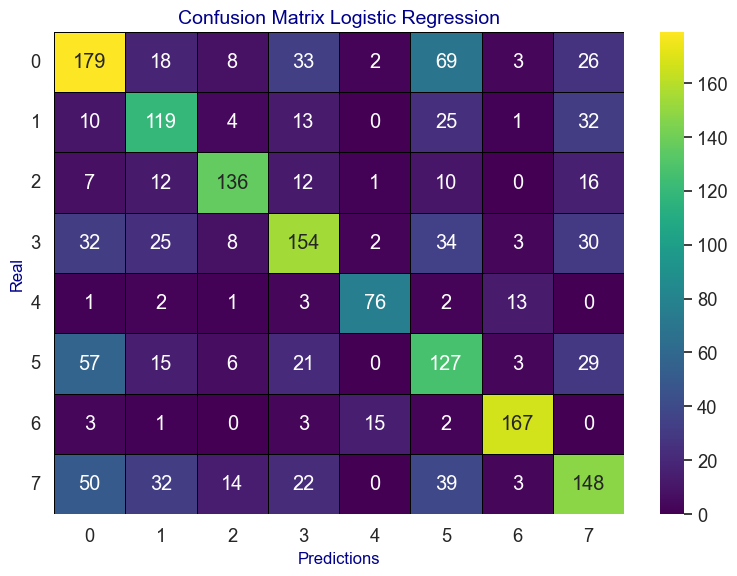

In [ ]:
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='viridis', xticklabels=classifier.classes_ , yticklabels=classifier.classes_ ,
            linewidths=0.5, linecolor='black', cbar=True)
plt.title('Confusion Matrix Logistic Regression', fontsize=14, color='darkblue')
plt.xlabel('Predictions', fontsize=12, color='darkblue')
plt.ylabel('Real', fontsize=12, color='darkblue')
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [ ]:
classes = np.unique(y)
print(classification_report(y_test.tolist(), y_pred.tolist(), labels=classes.tolist()))

              precision    recall  f1-score   support

           0       0.53      0.53      0.53       338
           1       0.53      0.58      0.56       204
           2       0.77      0.70      0.73       194
           3       0.59      0.53      0.56       288
           4       0.79      0.78      0.78        98
           5       0.41      0.49      0.45       258
           6       0.87      0.87      0.87       191
           7       0.53      0.48      0.50       308

    accuracy                           0.59      1879
   macro avg       0.63      0.62      0.62      1879
weighted avg       0.59      0.59      0.59      1879



In [ ]:
resultados = avaliar_modelo(y_test, y_pred, y_val, y_pred2)
resultados

,Accuracy,F1-Score,Recall,Precision
Teste,0.6334,0.6336,0.6334,0.6388
Validação,0.6198,0.6195,0.6198,0.6229


<center>

### Naive Bayes
</center>

- [X] [Preparação dos Dados](#secao52)
    - [X] [Escolha de Técnicas de modelação](#secao521)
      - [ ] [Decision Tree](#secao999)
      - [ ] [Random Forest](#secao998)
      - [ ] [XGBoost](#secao997)
      - [ ] [K-Nearest Neighbors](#secao996)
      - [ ] [SVM](#secao995)
      - [X] ~~[Regressão logística](#secao994)~~
      - [X] **[Naive Bayes](#secao993)**
      - [ ] [CNN (com pré treino FastText)](#secao993)

In [11]:
y = data["Emotion_num"].reset_index(drop=True)
X = data.drop(columns=["Emotion", "Emotion_num"]).reset_index(drop=True)

In [12]:
preprocessor = ColumnTransformer(transformers=[
    ('cleaned_text', TfidfVectorizer(max_features = 7000,max_df=0.3, min_df=2, ngram_range=(1,2)), 'cleaned_text'),
    ("Text", TfidfVectorizer(max_features = 7000, max_df=0.3, min_df=2, ngram_range=(1,2)),"Text"),
    ("enriched", TfidfVectorizer(max_features = 7000, max_df=0.3, min_df=2, ngram_range=(1,2)), "enriched"),
    ("entities", TfidfVectorizer(max_features = 7000, max_df=0.3, min_df=2, ngram_range=(1,2)), "entities"),
    ("pos_tags",TfidfVectorizer(max_features = 7000, max_df=0.3, min_df=2, ngram_range=(1,2)),"pos_tags"),
    ("tokens",TfidfVectorizer(max_features = 7000, max_df=0.3, min_df=2, ngram_range=(1,2)),"tokens"),
    ('num', MinMaxScaler(), ['sentiment']) #não aceita valores negativos
])

In [ ]:
#pipeline = Pipeline([('vectorizer', TfidfVectorizer()),('classifier', MultinomialNB())])
#param_grid = {
#    'vectorizer__max_features': [1000, 2000, 3000],
#    'vectorizer__min_df': [1, 2, 3],
#    'vectorizer__max_df': [0.4, 0.5, 0.6, 0.7],
#    'vectorizer__ngram_range': [(1, 3), (1, 4), (1, 5)]
#}
#pipeline = Pipeline([('vectorizer', preprocessor),('classifier', MultinomialNB())])
#grid_search = GridSearchCV(pipeline, param_grid, scoring='f1_weighted', cv=5, n_jobs=-1)
#grid_search.fit(X, y)
#print("Melhores Parâmetros:", grid_search.best_params_)
#print("Melhor F1-Score:", grid_search.best_score_)

Melhores Parâmetros: {'classifier__alpha': 0.5}
Melhor F1-Score: 0.6052276832528894


In [13]:
#vectorizer = TfidfVectorizer(max_features = 3000, min_df = 1, max_df = 0.1,ngram_range=(1, 1))
vectorizer=preprocessor
X = vectorizer.fit_transform(X).toarray()
joblib.dump(vectorizer, 'Parte1/EmotionFromText/vectorizerNB_Plutchik.joblib')

['Parte1/EmotionFromText/vectorizerNB_Plutchik.joblib']

In [14]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.40, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp)

In [16]:
param_grid = {'alpha': [0.5, 0.6, 0.7]}
grid_search = GridSearchCV(estimator=MultinomialNB(),param_grid=param_grid,scoring='f1_weighted',cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)
print("Melhores Parâmetros:", grid_search.best_params_)
print("Melhor Acurácia:", grid_search.best_score_)

Melhores Parâmetros: {'alpha': 0.6}
Melhor Acurácia: 0.5872953718886891


In [17]:
naive=MultinomialNB(alpha= 0.6)
naive.fit(X_train, y_train)
previsoesnb = naive.predict(X_test)
previsoesnb2 = naive.predict(X_val)

In [18]:
joblib.dump(naive, 'Parte1/EmotionFromText/TeseNB_model_Plutchik.joblib')

['Parte1/EmotionFromText/TeseNB_model_Plutchik.joblib']

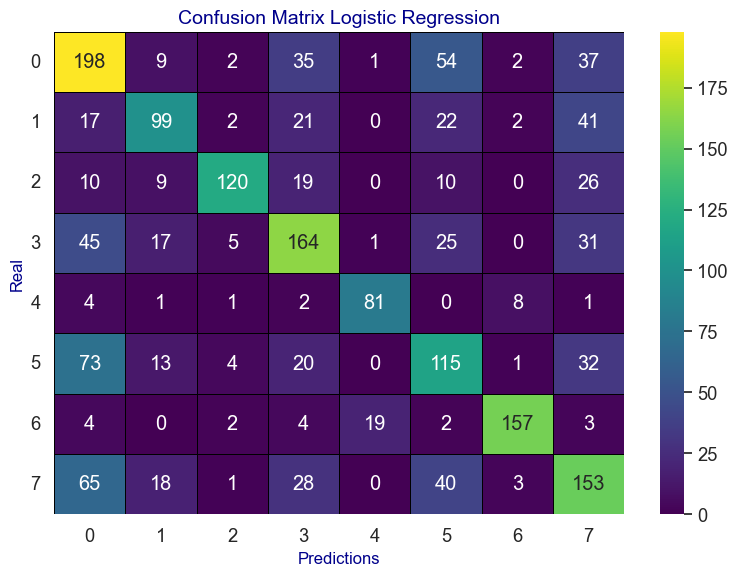

In [19]:
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(confusion_matrix(y_test, previsoesnb), annot=True, fmt='d', cmap='viridis', xticklabels=naive.classes_ , yticklabels=naive.classes_ ,
            linewidths=0.5, linecolor='black', cbar=True)

plt.title('Confusion Matrix Logistic Regression', fontsize=14, color='darkblue')
plt.xlabel('Predictions', fontsize=12, color='darkblue')
plt.ylabel('Real', fontsize=12, color='darkblue')
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [20]:
classes = np.unique(y)
print(classification_report(y_test.tolist(), previsoesnb.tolist(), labels=classes.tolist()))

              precision    recall  f1-score   support

           0       0.48      0.59      0.53       338
           1       0.60      0.49      0.54       204
           2       0.88      0.62      0.73       194
           3       0.56      0.57      0.56       288
           4       0.79      0.83      0.81        98
           5       0.43      0.45      0.44       258
           6       0.91      0.82      0.86       191
           7       0.47      0.50      0.48       308

    accuracy                           0.58      1879
   macro avg       0.64      0.61      0.62      1879
weighted avg       0.60      0.58      0.58      1879



In [21]:
resultados = avaliar_modelo(y_test, previsoesnb, y_val, previsoesnb2)
resultados

,Accuracy,F1-Score,Recall,Precision
Teste,0.5785,0.5833,0.5785,0.5966
Validação,0.6108,0.6135,0.6108,0.6278


<center>

### XBoost
</center>

- [X] [Preparação dos Dados](#secao52)
    - [X] [Escolha de Técnicas de modelação](#secao521)
      - [ ] [Decision Tree](#secao999)
      - [ ] [Random Forest](#secao998)
      - [X] **[XGBoost](#secao997)**
      - [ ] [K-Nearest Neighbors](#secao996)
      - [ ] [SVM](#secao995)
      - [X] ~~[Regressão logística](#secao994)~~
      - [X] ~~[Naive Bayes](#secao993)~~
      - [ ] [CNN (com pré treino Fastetext)](#secao993)

In [22]:
y = data["Emotion_num"].reset_index(drop=True)
X = data.drop(columns=["Emotion", "Emotion_num"]).reset_index(drop=True)

In [ ]:
#X = data['cleaned_text']
#y= data['Emotion_num']

In [23]:
preprocessor = ColumnTransformer(transformers=[
    ('cleaned_text', TfidfVectorizer(max_features = 7000,max_df=0.3, min_df=2, ngram_range=(1,2)), 'cleaned_text'),
    ("Text", TfidfVectorizer(max_features = 7000, max_df=0.3, min_df=2, ngram_range=(1,2)),"Text"),
    ("enriched", TfidfVectorizer(max_features = 7000, max_df=0.3, min_df=2, ngram_range=(1,2)), "enriched"),
    ("entities", TfidfVectorizer(max_features = 7000, max_df=0.3, min_df=2, ngram_range=(1,2)), "entities"),
    ("pos_tags",TfidfVectorizer(max_features = 7000, max_df=0.3, min_df=2, ngram_range=(1,2)),"pos_tags"),
    ("tokens",TfidfVectorizer(max_features = 7000, max_df=0.3, min_df=2, ngram_range=(1,2)),"tokens"),
    ('num', MinMaxScaler(), ['sentiment']) 
])

In [ ]:
#pipeline = Pipeline([('vectorizer', TfidfVectorizer()),('classifier', XGBClassifier())])
#param_grid = {
#    'vectorizer__max_features': [1000, 2000, 3000],
#    'vectorizer__min_df': [1, 2, 3],
#    'vectorizer__max_df': [0.4, 0.5, 0.6, 0.7],
#    'vectorizer__ngram_range': [(1, 3), (1, 4), (1, 5)]
#}
#pipeline = Pipeline([('vectorizer', preprocessor),('classifier', XGBClassifier())])
#grid_search = GridSearchCV(pipeline, param_grid, scoring='f1_weighted', cv=5, n_jobs=-1)
#grid_search.fit(X, y)
#print("Melhores Parâmetros:", grid_search.best_params_)
#print("Melhor F1-Score:", grid_search.best_score_)

In [24]:
#vectorizer = TfidfVectorizer(max_features = 4000, min_df = 1, max_df = 0.1,ngram_range=(1,1))
vectorizer=preprocessor
X = vectorizer.fit_transform(X).toarray()
joblib.dump(vectorizer, 'Parte1/EmotionFromText/vectorizerXGB_Plutchik.joblib')

['Parte1/EmotionFromText/vectorizerXGB_Plutchik.joblib']

In [25]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.40, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp)

In [ ]:
param_grid = {'n_estimators': [200, 300, 400],
              'learning_rate': [0.2, 0.3, 0.4],
              'max_depth': [10, 15, 20],
              'subsample': [0.8, 1.0],
              'colsample_bytree': [0.4, 0.5, 0.6]}
all_params = list(ParameterGrid(param_grid))
total = len(all_params)
best_score = -np.inf
best_params = None
start = time.time()
pbar = tqdm(total=total, desc="GridSearch Progress")
for params in all_params:
    model = XGBClassifier(random_state=42, **params, n_jobs=-1)
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='f1_weighted', n_jobs=-1)
    mean_score = scores.mean()

    if mean_score > best_score:
        best_score = mean_score
        best_params = params

    pbar.update(1)

pbar.close()
end = time.time()

print("Melhores Parâmetros:", best_params)
print("Melhor F1 ponderado:", best_score)

In [26]:
sample_weights = compute_sample_weight(class_weight='balanced', y=y_train)
xgb = XGBClassifier(colsample_bytree=0.4, learning_rate= 0.3, max_depth=10, n_estimators=200, subsample=1.0)
xgb.fit(X_train, y_train, sample_weight=sample_weights)
previsoesxgb = xgb.predict(X_test)
previsoesxgb2 = xgb.predict(X_val)

In [27]:
joblib.dump(xgb, 'Parte1/EmotionFromText/xgb_model_Plutchik.joblib')

['Parte1/EmotionFromText/xgb_model_Plutchik.joblib']

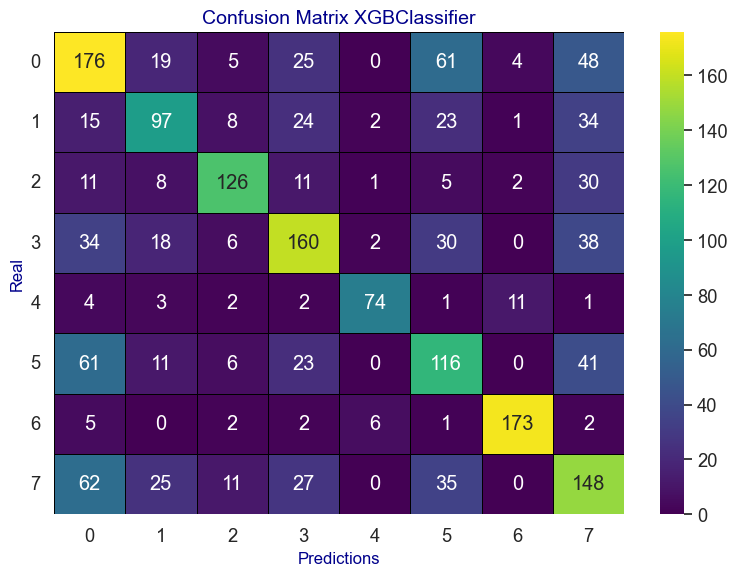

In [28]:
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(confusion_matrix(y_test, previsoesxgb), annot=True, fmt='d', cmap='viridis', xticklabels=xgb.classes_ , yticklabels=xgb.classes_ ,
            linewidths=0.5, linecolor='black', cbar=True)

plt.title('Confusion Matrix XGBClassifier', fontsize=14, color='darkblue')
plt.xlabel('Predictions', fontsize=12, color='darkblue')
plt.ylabel('Real', fontsize=12, color='darkblue')
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [29]:
classes = np.unique(y)
print(classification_report(y_test.tolist(), previsoesxgb.tolist(), labels=classes.tolist()))

              precision    recall  f1-score   support

           0       0.48      0.52      0.50       338
           1       0.54      0.48      0.50       204
           2       0.76      0.65      0.70       194
           3       0.58      0.56      0.57       288
           4       0.87      0.76      0.81        98
           5       0.43      0.45      0.44       258
           6       0.91      0.91      0.91       191
           7       0.43      0.48      0.46       308

    accuracy                           0.57      1879
   macro avg       0.62      0.60      0.61      1879
weighted avg       0.58      0.57      0.57      1879



In [30]:
resultados = avaliar_modelo(y_test, previsoesxgb, y_val, previsoesxgb2)
resultados

,Accuracy,F1-Score,Recall,Precision
Teste,0.5695,0.5729,0.5695,0.5791
Validação,0.5857,0.5887,0.5857,0.5945



<center>

### Decision Tree
</center>

- [X] [Preparação dos Dados](#secao52)
    - [X] [Escolha de Técnicas de modelação](#secao521)
      - [X] **[Decision Tree](#secao999)**
      - [ ] [Random Forest](#secao998)
      - [X] ~~[XGBoost](#secao997)~~
      - [ ] [K-Nearest Neighbors](#secao996)
      - [ ] [SVM](#secao995)
      - [X] ~~[Regressão logística](#secao994)~~
      - [X] ~~[Naive Bayes](#secao993)~~
      - [ ] [CNN (com pré treino Fasttext)](#secao993)


In [ ]:
#X = data['cleaned_text']
#y= data['Emotion_num']

In [31]:
y = data["Emotion_num"].reset_index(drop=True)
X = data.drop(columns=["Emotion", "Emotion_num"]).reset_index(drop=True)

In [32]:
preprocessor = ColumnTransformer(transformers=[
    ('cleaned_text', TfidfVectorizer(max_features = 7000,max_df=0.3, min_df=2, ngram_range=(1,2)), 'cleaned_text'),
    ("Text", TfidfVectorizer(max_features = 7000, max_df=0.3, min_df=2, ngram_range=(1,2)),"Text"),
    ("enriched", TfidfVectorizer(max_features = 7000, max_df=0.3, min_df=2, ngram_range=(1,2)), "enriched"),
    ("entities", TfidfVectorizer(max_features = 7000, max_df=0.3, min_df=2, ngram_range=(1,2)), "entities"),
    ("pos_tags",TfidfVectorizer(max_features = 7000, max_df=0.3, min_df=2, ngram_range=(1,2)),"pos_tags"),
    ("tokens",TfidfVectorizer(max_features = 7000, max_df=0.3, min_df=2, ngram_range=(1,2)),"tokens"),
    ('num', MinMaxScaler(), ['sentiment']) 
])

In [ ]:
#pipeline = Pipeline([('vectorizer', TfidfVectorizer()),('classifier', DecisionTreeClassifier())])
#param_grid = {
#    'vectorizer__max_features': [1000, 2000, 3000],
#    'vectorizer__min_df': [1, 2, 3],
#    'vectorizer__max_df': [0.4, 0.5, 0.6, 0.7],
#    'vectorizer__ngram_range': [(1, 3), (1, 4), (1, 5)]
#}
#grid_search = GridSearchCV(pipeline, param_grid, scoring='f1_weighted', cv=5, n_jobs=-1)
#grid_search.fit(X, y)
#print("Melhores Parâmetros:", grid_search.best_params_)
#print("Melhor F1-Score:", grid_search.best_score_)

Melhores Parâmetros: {'vectorizer__max_df': 0.5, 'vectorizer__max_features': 2000, 'vectorizer__min_df': 2, 'vectorizer__ngram_range': (1, 4)}
Melhor F1-Score: 0.48570006782294906


In [33]:
#vectorizer = TfidfVectorizer(max_features = 2000, min_df = 2,max_df = 0.5,ngram_range=(1,4))
vectorizer=preprocessor
X = vectorizer.fit_transform(X).toarray()
joblib.dump(vectorizer, 'Parte1/EmotionFromText/vectorizerDT_Plutchik.joblib')

['Parte1/EmotionFromText/vectorizerDT_Plutchik.joblib']

In [34]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.40, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp)

In [ ]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'min_samples_split': [2, 10],
    'max_depth': [None, 10],
    'min_samples_leaf': [1, 4],
    'max_features': [None, 'sqrt'],
    'ccp_alpha': [0.0, 0.05], 
    'max_leaf_nodes': [None, 50], 
    'min_weight_fraction_leaf': [0.0, 0.05],
}
all_params = list(ParameterGrid(param_grid))
total = len(all_params)
best_score = -np.inf
best_params = None
start = time.time()
pbar = tqdm(total=total, desc="GridSearch Progress")
for params in all_params:
    model = DecisionTreeClassifier(random_state=42, **params)
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='f1_weighted', n_jobs=-1)
    mean_score = scores.mean()

    if mean_score > best_score:
        best_score = mean_score
        best_params = params
    pbar.update(1)
pbar.close()
end = time.time()
print("Melhores Parâmetros:", best_params)
print("Melhor F1 ponderado:", best_score)

In [35]:
arvore = DecisionTreeClassifier(max_depth=None,
                                ccp_alpha=0.0, 
                                criterion='gini',
                                class_weight='balanced',
                                max_features=None,
                                max_leaf_nodes=None,
                                min_samples_leaf=1,
                                min_samples_split=10,
                                splitter='best',
                                min_weight_fraction_leaf=0.0)
arvore.fit(X_train,y_train)
previsoesdt = arvore.predict(X_test)
previsoesdt2 = arvore.predict(X_val)

In [36]:
joblib.dump(arvore, 'Parte1/EmotionFromText/DT_Plutchik.joblib')

['Parte1/EmotionFromText/DT_Plutchik.joblib']

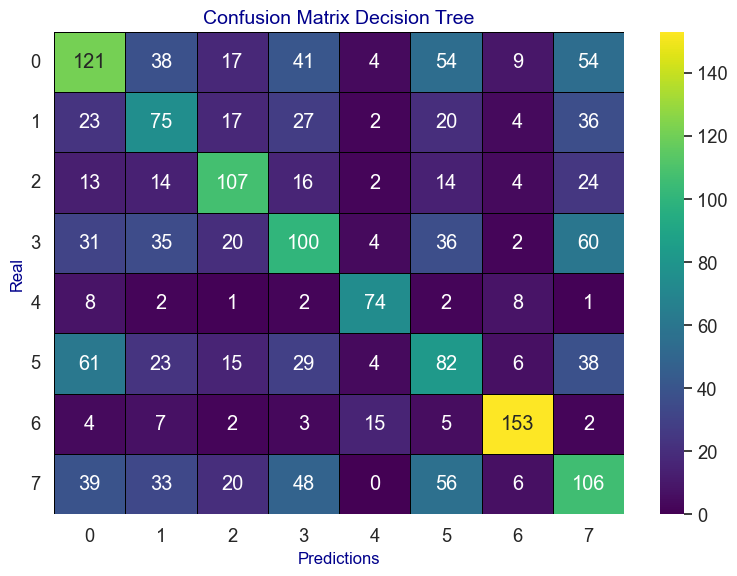

In [37]:
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(confusion_matrix(y_test, previsoesdt), annot=True, fmt='d', cmap='viridis', xticklabels=arvore.classes_ , yticklabels=arvore.classes_ ,
            linewidths=0.5, linecolor='black', cbar=True)

plt.title('Confusion Matrix Decision Tree', fontsize=14, color='darkblue')
plt.xlabel('Predictions', fontsize=12, color='darkblue')
plt.ylabel('Real', fontsize=12, color='darkblue')
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [38]:
classes = np.unique(y)
print(classification_report(y_test.tolist(), previsoesdt.tolist(), labels=classes.tolist()))

              precision    recall  f1-score   support

           0       0.40      0.36      0.38       338
           1       0.33      0.37      0.35       204
           2       0.54      0.55      0.54       194
           3       0.38      0.35      0.36       288
           4       0.70      0.76      0.73        98
           5       0.30      0.32      0.31       258
           6       0.80      0.80      0.80       191
           7       0.33      0.34      0.34       308

    accuracy                           0.44      1879
   macro avg       0.47      0.48      0.48      1879
weighted avg       0.44      0.44      0.43      1879



In [39]:
resultados = avaliar_modelo(y_test, previsoesdt, y_val, previsoesdt2)
resultados

,Accuracy,F1-Score,Recall,Precision
Teste,0.4353,0.4348,0.4353,0.4353
Validação,0.4356,0.4331,0.4356,0.4336


<center>

### Random Forest
</center>

- [X] [Preparação dos Dados](#secao52)
    - [X] [Escolha de Técnicas de modelação](#secao521)
      - [X] ~~[Decision Tree](#secao999)~~
      - [X] **[Random Forest](#secao998)**
      - [X] ~~[XGBoost](#secao997)~~
      - [ ] [K-Nearest Neighbors](#secao996)
      - [ ] [SVM](#secao995)
      - [X] ~~[Regressão logística](#secao994)~~
      - [X] ~~[Naive Bayes](#secao993)~~
      - [ ] [CNN (com pré treino Fasttext)](#secao993)

In [ ]:
#X = data['cleaned_text']
#y= data['Emotion_num']

In [40]:
y = data["Emotion_num"].reset_index(drop=True)
X = data.drop(columns=["Emotion", "Emotion_num"]).reset_index(drop=True)

In [41]:
preprocessor = ColumnTransformer(transformers=[
    ('cleaned_text', TfidfVectorizer(max_features = 7000,max_df=0.3, min_df=2, ngram_range=(1,2)), 'cleaned_text'),
    ("Text", TfidfVectorizer(max_features = 7000, max_df=0.3, min_df=2, ngram_range=(1,2)),"Text"),
    ("enriched", TfidfVectorizer(max_features = 7000, max_df=0.3, min_df=2, ngram_range=(1,2)), "enriched"),
    ("entities", TfidfVectorizer(max_features = 7000, max_df=0.3, min_df=2, ngram_range=(1,2)), "entities"),
    ("pos_tags",TfidfVectorizer(max_features = 7000, max_df=0.3, min_df=2, ngram_range=(1,2)),"pos_tags"),
    ("tokens",TfidfVectorizer(max_features = 7000, max_df=0.3, min_df=2, ngram_range=(1,2)),"tokens"),
    ('num', MinMaxScaler(), ['sentiment']) 
])

In [ ]:
#pipeline = Pipeline([('vectorizer', TfidfVectorizer()),('classifier', RandomForestClassifier())])
#param_grid = {
#    'vectorizer__max_features': [13000, 14000, 15000],
#    'vectorizer__min_df': [1, 2, 3],
#    'vectorizer__max_df': [0.7, 0.8, 0.9],
#    'vectorizer__ngram_range': [(1, 1), (1, 2), (1, 3)]
#}
#grid_search = GridSearchCV(pipeline, param_grid, scoring='f1_weighted', cv=5, n_jobs=-1)
#grid_search.fit(X, y)
#print("Melhores Parâmetros:", grid_search.best_params_)
#print("Melhor F1-Score:", grid_search.best_score_)

Melhores Parâmetros: {'vectorizer__max_df': 0.7, 'vectorizer__max_features': 14000, 'vectorizer__min_df': 3, 'vectorizer__ngram_range': (1, 1)}
Melhor F1-Score: 0.559492765055701


In [42]:
#vectorizer = TfidfVectorizer(max_features = 14000, min_df = 3, max_df = 0.7,ngram_range= (1,1))
vectorizer=preprocessor
X = vectorizer.fit_transform(X).toarray()
joblib.dump(vectorizer, 'Parte1/EmotionFromText/vectorizerRF_Plutchik.joblib')

['Parte1/EmotionFromText/vectorizerRF_Plutchik.joblib']

In [43]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.40, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp)

In [ ]:
param_grid = {
    'n_estimators': [100, 200],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 10],
    'max_depth': [None, 20],
    'min_samples_leaf': [1, 4],
    'max_features': [None, 'sqrt'],
    'ccp_alpha': [0.0, 0.05],
    'max_leaf_nodes': [None, 50],
    'min_weight_fraction_leaf': [0.0, 0.05],
}
all_params = list(ParameterGrid(param_grid))
total = len(all_params)
best_score = -np.inf
best_params = None
start = time.time()
pbar = tqdm(total=total, desc="GridSearch Progress")

for params in all_params:
    model = RandomForestClassifier(random_state=42, n_jobs=-1, **params)
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='f1_weighted', n_jobs=-1)
    mean_score = scores.mean()
    if mean_score > best_score:
        best_score = mean_score
        best_params = params
    pbar.update(1)
pbar.close()
end = time.time()
print("Melhores Parâmetros:", best_params)
print("Melhor F1 ponderado:", best_score)

In [44]:
randomforest = RandomForestClassifier(class_weight='balanced',
                                      ccp_alpha=0.0,
                                      criterion='gini',
                                      n_estimators=200,
                                      max_leaf_nodes=None,
                                      min_samples_leaf=1, 
                                      max_depth=None,
                                      min_weight_fraction_leaf=0.0,
                                      min_samples_split=10,
                                      max_features='sqrt',
                                      random_state=42)
randomforest.fit(X_train, y_train)
previsoesrf = randomforest.predict(X_test)
previsoesrf2 = randomforest.predict(X_val)

In [45]:
joblib.dump(randomforest, 'Parte1/EmotionFromText/RT_Plutchik.joblib')

['Parte1/EmotionFromText/RT_Plutchik.joblib']

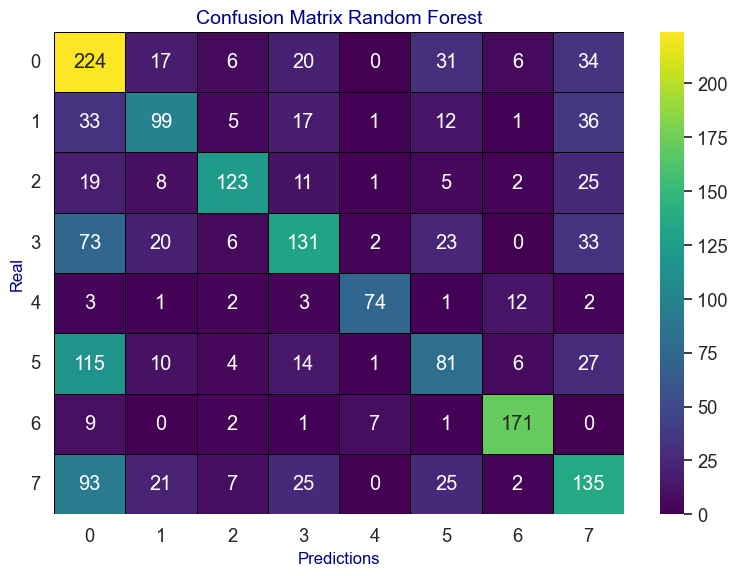

In [46]:
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(confusion_matrix(y_test, previsoesrf), annot=True, fmt='d', cmap='viridis', xticklabels=randomforest.classes_ , yticklabels=randomforest.classes_ ,
            linewidths=0.5, linecolor='black', cbar=True)

plt.title('Confusion Matrix Random Forest', fontsize=14, color='darkblue')
plt.xlabel('Predictions', fontsize=12, color='darkblue')
plt.ylabel('Real', fontsize=12, color='darkblue')
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [47]:
classes = np.unique(y)
print(classification_report(y_test.tolist(), previsoesrf.tolist(), labels=classes.tolist()))

              precision    recall  f1-score   support

           0       0.39      0.66      0.49       338
           1       0.56      0.49      0.52       204
           2       0.79      0.63      0.70       194
           3       0.59      0.45      0.51       288
           4       0.86      0.76      0.80        98
           5       0.45      0.31      0.37       258
           6       0.85      0.90      0.87       191
           7       0.46      0.44      0.45       308

    accuracy                           0.55      1879
   macro avg       0.62      0.58      0.59      1879
weighted avg       0.57      0.55      0.55      1879



In [48]:
resultados = avaliar_modelo(y_test, previsoesrf, y_val, previsoesrf2)
resultados

,Accuracy,F1-Score,Recall,Precision
Teste,0.5524,0.5525,0.5524,0.5740
Validação,0.5831,0.5807,0.5831,0.6044


<center>

### K-Nearest Neighbors
</center>

- [X] [Preparação dos Dados](#secao52)
    - [X] [Escolha de Técnicas de modelação](#secao521)
      - [X] ~~[Decision Tree](#secao999)~~
      - [X] ~~[Random Forest](#secao998)~~
      - [X] ~~[XGBoost](#secao997)~~
      - [X] **[K-Nearest Neighbors](#secao996)**
      - [ ] [SVM](#secao995)
      - [X] ~~[Regressão logística](#secao994)~~
      - [X] ~~[Naive Bayes](#secao993)~~
      - [ ] [CNN (com pré treino GloVe)](#secao993)

In [49]:
y = data["Emotion_num"].reset_index(drop=True)
X = data.drop(columns=["Emotion", "Emotion_num"]).reset_index(drop=True)

In [ ]:
#X = data['cleaned_text']
#y= data['Emotion_num']

In [50]:
preprocessor = ColumnTransformer(transformers=[
    ('cleaned_text', TfidfVectorizer(max_features = 7000,max_df=0.3, min_df=2, ngram_range=(1,2)), 'cleaned_text'),
    ("Text", TfidfVectorizer(max_features = 7000, max_df=0.3, min_df=2, ngram_range=(1,2)),"Text"),
    ("enriched", TfidfVectorizer(max_features = 7000, max_df=0.3, min_df=2, ngram_range=(1,2)), "enriched"),
    ("entities", TfidfVectorizer(max_features = 7000, max_df=0.3, min_df=2, ngram_range=(1,2)), "entities"),
    ("pos_tags",TfidfVectorizer(max_features = 7000, max_df=0.3, min_df=2, ngram_range=(1,2)),"pos_tags"),
    ("tokens",TfidfVectorizer(max_features = 7000, max_df=0.3, min_df=2, ngram_range=(1,2)),"tokens"),
    ('num', MinMaxScaler(), ['sentiment']) 
])

In [ ]:
#pipeline = Pipeline([('vectorizer', TfidfVectorizer()),('classifier',  KNeighborsClassifier())])
#param_grid = {
#    'vectorizer__max_features': [100, 500, 1000],
#    'vectorizer__min_df': [2, 3, 4],
#    'vectorizer__max_df': [0.1, 0.2, 0.3, 0.4],
#    'vectorizer__ngram_range': [(1, 1), (1, 2), (1, 3)]
#}
#grid_search = GridSearchCV(pipeline, param_grid, scoring='f1_weighted', cv=5, n_jobs=-1)
#grid_search.fit(X, y)
#print("Melhores Parâmetros:", grid_search.best_params_)
#print("Melhor F1-Score:", grid_search.best_score_)

Melhores Parâmetros: {'vectorizer__max_df': 0.1, 'vectorizer__max_features': 500, 'vectorizer__min_df': 3, 'vectorizer__ngram_range': (1, 2)}
Melhor F1-Score: 0.3664124773471813


In [51]:
#vectorizer = TfidfVectorizer(max_features = 500, min_df = 3, max_df = 0.1,ngram_range=(1, 2))
vectorizer=preprocessor
X = vectorizer.fit_transform(X).toarray()
joblib.dump(vectorizer, 'Parte1/EmotionFromText/vectorizerKNN_Plutchik.joblib')

['Parte1/EmotionFromText/vectorizerKNN_Plutchik.joblib']

In [52]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.40, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp)

In [ ]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'p': [1, 2],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [10, 30, 50],
}
all_params = list(ParameterGrid(param_grid))
total = len(all_params)
best_score = -np.inf
best_params = None
start = time.time()
pbar = tqdm(total=total, desc="GridSearch Progress")
for params in all_params:
    model = KNeighborsClassifier(**params)
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='f1_weighted', n_jobs=-1)
    mean_score = scores.mean()
    
    if mean_score > best_score:
        best_score = mean_score
        best_params = params

    pbar.update(1)

pbar.close()
end = time.time()

print("Melhores Parâmetros:", best_params)
print("Melhor F1 ponderado:", best_score)

In [53]:
knn = KNeighborsClassifier(algorithm='auto', n_neighbors=5, weights='distance', leaf_size= 10, p=1, metric='manhattan')
knn.fit(X_train, y_train)
previsoesknn = knn.predict(X_test)
previsoesknn2 = knn.predict(X_val)

In [54]:
joblib.dump(knn, 'Parte1/EmotionFromText/KNN_Plutchik.joblib')

['Parte1/EmotionFromText/KNN_Plutchik.joblib']

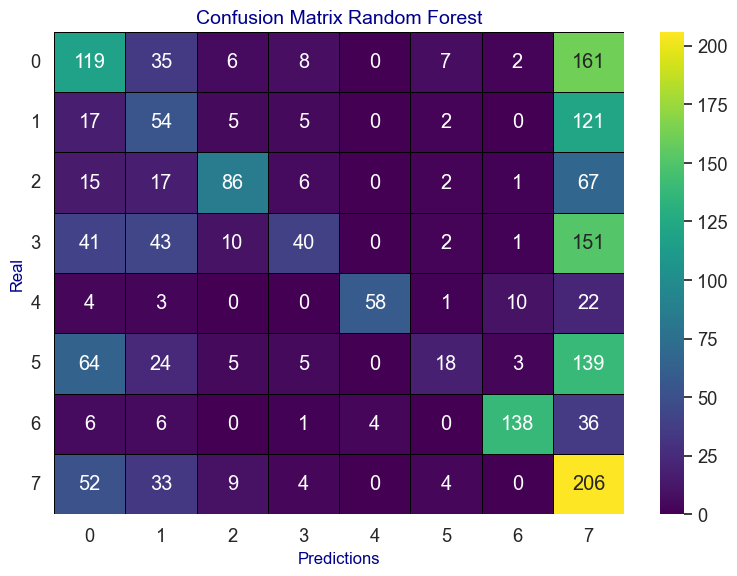

In [55]:
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(confusion_matrix(y_test, previsoesknn), annot=True, fmt='d', cmap='viridis', xticklabels=knn.classes_ , yticklabels=knn.classes_ ,
            linewidths=0.5, linecolor='black', cbar=True)

plt.title('Confusion Matrix Random Forest', fontsize=14, color='darkblue')
plt.xlabel('Predictions', fontsize=12, color='darkblue')
plt.ylabel('Real', fontsize=12, color='darkblue')
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [56]:
classes = np.unique(y)
print(classification_report(y_test.tolist(), previsoesknn.tolist(), labels=classes.tolist()))

              precision    recall  f1-score   support

           0       0.37      0.35      0.36       338
           1       0.25      0.26      0.26       204
           2       0.71      0.44      0.55       194
           3       0.58      0.14      0.22       288
           4       0.94      0.59      0.72        98
           5       0.50      0.07      0.12       258
           6       0.89      0.72      0.80       191
           7       0.23      0.67      0.34       308

    accuracy                           0.38      1879
   macro avg       0.56      0.41      0.42      1879
weighted avg       0.50      0.38      0.38      1879



In [57]:
resultados = avaliar_modelo(y_test, previsoesknn, y_val, previsoesknn2)
resultados

,Accuracy,F1-Score,Recall,Precision
Teste,0.3827,0.3754,0.3827,0.5022
Validação,0.3759,0.3599,0.3759,0.4876


<center>

### SVC
</center>

- [X] [Preparação dos Dados](#secao52)
    - [X] [Escolha de Técnicas de modelação](#secao521)
      - [X] ~~[Decision Tree](#secao999)~~
      - [X] ~~[Random Forest](#secao998)~~
      - [X] ~~[XGBoost](#secao997)~~
      - [X] ~~[K-Nearest Neighbors](#secao996)~~
      - [X] **[SVM](#secao995)**
      - [X] ~~[Regressão logística](#secao994)~~
      - [X] ~~[Naive Bayes](#secao993)~~
      - [ ] [CNN (com pré treino FastText)](#secao993)

In [58]:
y = data["Emotion_num"].reset_index(drop=True)
X = data.drop(columns=["Emotion", "Emotion_num"]).reset_index(drop=True)

In [ ]:
#X = data['cleaned_text']
#y= data['Emotion_num']

In [59]:
preprocessor = ColumnTransformer(transformers=[
    ('cleaned_text', TfidfVectorizer(max_features = 7000,max_df=0.3, min_df=2, ngram_range=(1,2)), 'cleaned_text'),
    ("Text", TfidfVectorizer(max_features = 7000, max_df=0.3, min_df=2, ngram_range=(1,2)),"Text"),
    ("enriched", TfidfVectorizer(max_features = 7000, max_df=0.3, min_df=2, ngram_range=(1,2)), "enriched"),
    ("entities", TfidfVectorizer(max_features = 7000, max_df=0.3, min_df=2, ngram_range=(1,2)), "entities"),
    ("pos_tags",TfidfVectorizer(max_features = 7000, max_df=0.3, min_df=2, ngram_range=(1,2)),"pos_tags"),
    ("tokens",TfidfVectorizer(max_features = 7000, max_df=0.3, min_df=2, ngram_range=(1,2)),"tokens"),
    ('num', MinMaxScaler(), ['sentiment']) 
])

In [ ]:
#pipeline = Pipeline([('vectorizer', TfidfVectorizer()),('classifier', SVC())])
#param_grid = {'vectorizer__max_features': [5000, 6000, 7000],
#              'vectorizer__min_df': [1, 2, 3],
#              'vectorizer__max_df': [0.1, 0.2, 0.3, 0.4],
#              'vectorizer__ngram_range': [(1, 1), (1, 2), (1, 3)]
#}
#grid_search = GridSearchCV(pipeline, param_grid, scoring='f1_weighted', cv=5, n_jobs=-1)
#grid_search.fit(X, y)
#print("Melhores Parâmetros:", grid_search.best_params_)
#print("Melhor F1-Score:", grid_search.best_score_)

Melhores Parâmetros: {'vectorizer__max_df': 0.1, 'vectorizer__max_features': 5000, 'vectorizer__min_df': 1, 'vectorizer__ngram_range': (1, 1)}
Melhor F1-Score: 0.5839006809216964


In [60]:
#vectorizer = TfidfVectorizer(max_features = 5000, min_df = 1, max_df = 0.1,ngram_range=(1, 1))
vectorizer=preprocessor
X = vectorizer.fit_transform(X).toarray()
joblib.dump(vectorizer, 'Parte1/EmotionFromText/vectorizersvm_Plutchik.joblib')

['Parte1/EmotionFromText/vectorizersvm_Plutchik.joblib']

In [61]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.40, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp)

In [62]:
#param_grid = {
#    'C': [1, 10], 
#    'kernel': ['linear', 'rbf'], 
#    'degree': [3],
#    'gamma': ['scale', 0.01], 
#    'class_weight': [None], 
#    'shrinking': [True] 
#}
#all_params = list(ParameterGrid(param_grid))
#total = len(all_params)

#best_score = -np.inf
#best_params = None

#start = time.time()
#pbar = tqdm(total=total, desc="GridSearch Progress")

#for params in all_params:
#    model = SVC(**params)
#    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='f1_weighted', n_jobs=-1)
#    mean_score = scores.mean()

#    if mean_score > best_score:
#        best_score = mean_score
#        best_params = params

#    pbar.update(1)

#pbar.close()
#end = time.time()
#print("Melhores Parâmetros:", best_params)
#print("Melhor F1 ponderado:", best_score)

In [63]:
SVCmodel = SVC(C=10,degree=3, gamma=0.01,kernel='rbf',shrinking=True, class_weight='balanced',)
SVCmodel.fit(X_train, y_train)
previsoessvc = SVCmodel.predict(X_test)
previsoessvc2 = SVCmodel.predict(X_val)

In [64]:
joblib.dump(SVCmodel, 'Parte1/EmotionFromText/SVM_Plutchik.joblib')

['Parte1/EmotionFromText/SVM_Plutchik.joblib']

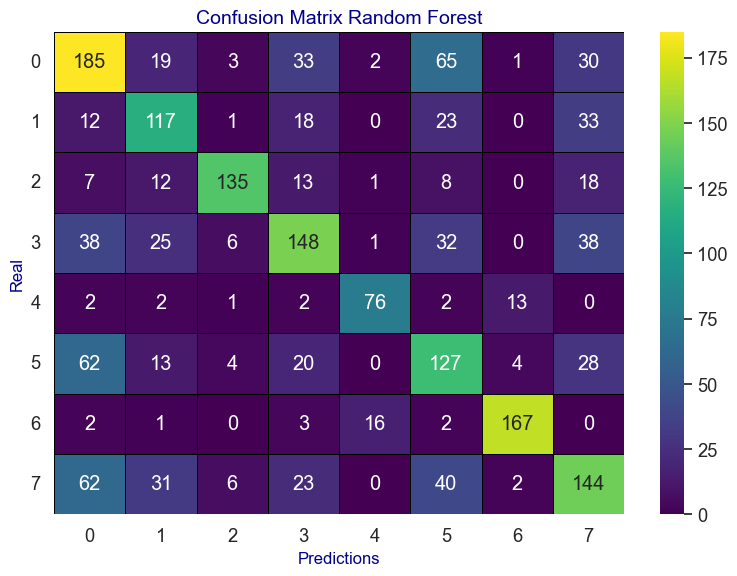

In [65]:
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(confusion_matrix(y_test, previsoessvc), annot=True, fmt='d', cmap='viridis', xticklabels=SVCmodel.classes_ , yticklabels=SVCmodel.classes_ ,
            linewidths=0.5, linecolor='black', cbar=True)

plt.title('Confusion Matrix Random Forest', fontsize=14, color='darkblue')
plt.xlabel('Predictions', fontsize=12, color='darkblue')
plt.ylabel('Real', fontsize=12, color='darkblue')
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [66]:
classes = np.unique(y)
print(classification_report(y_test.tolist(), previsoessvc.tolist(), labels=classes.tolist()))

              precision    recall  f1-score   support

           0       0.50      0.55      0.52       338
           1       0.53      0.57      0.55       204
           2       0.87      0.70      0.77       194
           3       0.57      0.51      0.54       288
           4       0.79      0.78      0.78        98
           5       0.42      0.49      0.46       258
           6       0.89      0.87      0.88       191
           7       0.49      0.47      0.48       308

    accuracy                           0.58      1879
   macro avg       0.63      0.62      0.62      1879
weighted avg       0.60      0.58      0.59      1879



In [67]:
resultados = avaliar_modelo(y_test, previsoessvc, y_val, previsoessvc2)
resultados

,Accuracy,F1-Score,Recall,Precision
Teste,0.5849,0.5885,0.5849,0.5958
Validação,0.6390,0.6420,0.6390,0.6478


<center>

### CNN (com pré treino GLove)
</center>

- [X] [Preparação dos Dados](#secao52)
    - [X] [Escolha de Técnicas de modelação](#secao521)
      - [X] ~~[Decision Tree](#secao999)~~
      - [X] ~~[Random Forest](#secao998)~~
      - [X] ~~[XGBoost](#secao997)~~
      - [X] ~~[K-Nearest Neighbors](#secao996)~~
      - [X] ~~[SVM](#secao995)~~
      - [X] ~~[Regressão logística](#secao994)~~
      - [X] ~~[Naive Bayes](#secao993)~~
      - [ ] **[CNN (com pré treino Glove)](#secao993)**

In [88]:
#corpus = data['cleaned_text'].tolist()
#corpus = [text for text in corpus if text.strip() != ""]
#labels = data['Emotion_num'].values

In [68]:
y = data["Emotion_num"].reset_index(drop=True)
X = data.drop(columns=["Emotion", "Emotion_num"]).reset_index(drop=True)

In [69]:
corpus = X.apply(lambda row: ' '.join(str(val) for val in row if pd.notnull(val)), axis=1).tolist()
labels = y.values

In [70]:
embedding_index = {}
with open("Recursos\\glove.6B.200d.txt", encoding="utf8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        coeffs = np.asarray(values[1:], dtype="float32")
        embedding_index[word] = coeffs
tokenizer = Tokenizer(num_words=20000, oov_token="<OOV>")
tokenizer.fit_on_texts(corpus)
sequences = tokenizer.texts_to_sequences(corpus)
padded = pad_sequences(sequences, maxlen=200, padding='post')
word_index = tokenizer.word_index
with open("Recursos\\tokenizer_glove.pkl", "wb") as f:
    pickle.dump(tokenizer, f)
embedding_dim = 200
num_words = 20000
embedding_matrix = np.zeros((num_words, embedding_dim))
for word, i in word_index.items():
    if i >= num_words:
        continue
    embedding_vector = embedding_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector
np.save("Parte1/EmotionFromText/Glove_CNN_EN_embedding_matrix_Plutchik.npy", embedding_matrix)

In [71]:
X_train, X_temp, y_train, y_temp = train_test_split(padded, labels, test_size=0.4, random_state=42, stratify=labels)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

In [73]:
y_train_cat = to_categorical(y_train, num_classes=8)
y_val_cat = to_categorical(y_val, num_classes=8)
y_test_cat = to_categorical(y_test, num_classes=8)

In [77]:
model = Sequential()
model.add(Embedding(input_dim=num_words, output_dim=embedding_dim, weights=[embedding_matrix], trainable=False))
model.add(Conv1D(filters=64, kernel_size=7, activation='relu', kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.9))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(8, activation='softmax'))
model.compile(optimizer=Adam(learning_rate=1e-4, weight_decay=1e-3), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │     4,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,000,000 (15.26 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 4,000,000 (15.26 MB)

In [78]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=3, restore_best_weights=True)
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=1, mode='min')
checkpoint = ModelCheckpoint("Parte1/EmotionFromText/best_cnn_model_Plutchik.keras", monitor='val_loss', save_best_only=True, mode='min')
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights = dict(enumerate(class_weights))

In [79]:
history = model.fit(
    X_train, y_train_cat,
    validation_data=(X_val, y_val_cat),
    epochs=300,
    batch_size=16,
    callbacks=[early_stop, lr_reduce, checkpoint], class_weight=class_weights
)

Epoch 1/300
353/353 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.1228 - loss: 6.6668 - val_accuracy: 0.1512 - val_loss: 3.0232 - learning_rate: 1.0000e-04
Epoch 2/300
353/353 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.1511 - loss: 3.7760 - val_accuracy: 0.1475 - val_loss: 3.0205 - learning_rate: 1.0000e-04
Epoch 3/300
353/353 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.1357 - loss: 3.2588 - val_accuracy: 0.1470 - val_loss: 3.0047 - learning_rate: 1.0000e-04
Epoch 4/300
353/353 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.1484 - loss: 3.1005 - val_accuracy: 0.1491 - val_loss: 2.9743 - learning_rate: 1.0000e-04
Epoch 5/300
353/353 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.1483 - loss: 3.0009 - val_accuracy: 0.1464 - val_loss: 2.9383 - learning_rate: 1.0000e-04
Epoch 6/300
353/353 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.1411 - loss: 2.9590 - val_accuracy: 0.1454 - val_loss: 2.8996 - learning_rate: 1.0000e-04
Epoch 7/300
353/353 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/ste

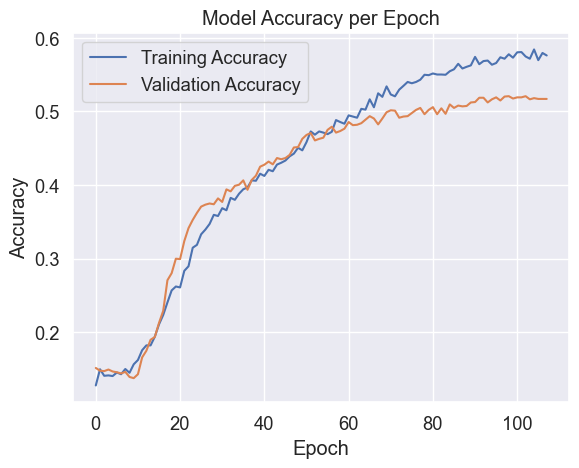

In [80]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


In [81]:
model_path = "Parte1/EmotionFromText/sentimentcnnmodel_Plutchik.h5"
model.save(model_path)

You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


In [82]:
previsoesCNN = model.predict(X_test)
previsoesCNNval = model.predict(X_val)

59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


In [83]:
previsoesCNN2 = np.argmax(previsoesCNN, axis=1)
previsoesCNNval2 = np.argmax(previsoesCNNval, axis=1)

In [84]:
train_loss, train_accuracy = model.evaluate(X_train, y_train_cat)
test_loss, test_accuracy = model.evaluate(X_test, y_test_cat)
val_loss, val_accuracy = model.evaluate(X_val, y_val_cat)

177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6899 - loss: 0.9892
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5013 - loss: 1.3929
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5156 - loss: 1.3846


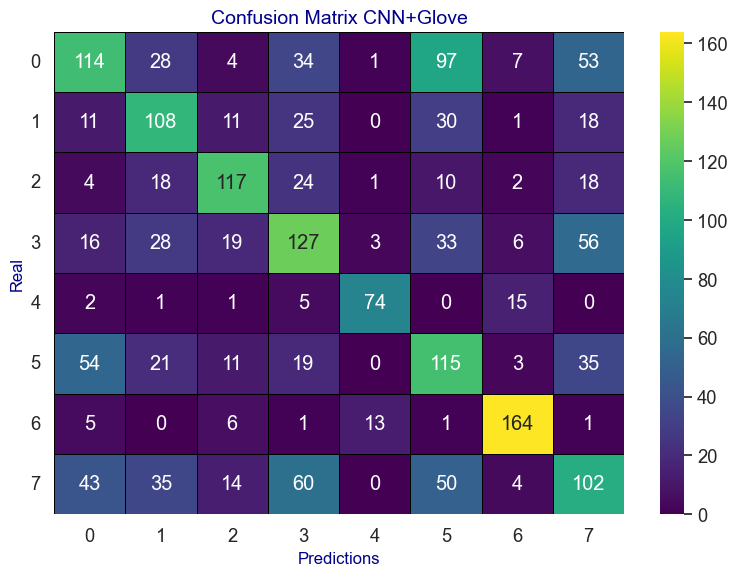

In [85]:
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(confusion_matrix(y_test, previsoesCNN2), annot=True, fmt='d', cmap='viridis',
            linewidths=0.5, linecolor='black', cbar=True)

plt.title('Confusion Matrix CNN+Glove', fontsize=14, color='darkblue')
plt.xlabel('Predictions', fontsize=12, color='darkblue')
plt.ylabel('Real', fontsize=12, color='darkblue')
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [86]:
classes = np.unique(y)
print(classification_report(y_test.tolist(), previsoesCNN2.tolist(), labels=classes.tolist()))

              precision    recall  f1-score   support

           0       0.46      0.34      0.39       338
           1       0.45      0.53      0.49       204
           2       0.64      0.60      0.62       194
           3       0.43      0.44      0.44       288
           4       0.80      0.76      0.78        98
           5       0.34      0.45      0.39       258
           6       0.81      0.86      0.83       191
           7       0.36      0.33      0.35       308

    accuracy                           0.49      1879
   macro avg       0.54      0.54      0.53      1879
weighted avg       0.49      0.49      0.49      1879



In [87]:
resultados = avaliar_modelo(y_test, previsoesCNN2, y_val, previsoesCNNval2)
resultados

,Accuracy,F1-Score,Recall,Precision
Teste,0.4902,0.4889,0.4902,0.4940
Validação,0.5181,0.5173,0.5181,0.5234


### RNN (com pré treino GLove)

In [53]:
#corpus = data['cleaned_text'].tolist()
#corpus = [text for text in corpus if text.strip() != ""]
#labels = data['Emotion_num'].values

In [88]:
y = data["Emotion_num"].reset_index(drop=True)
X = data.drop(columns=["Emotion", "Emotion_num"]).reset_index(drop=True)

In [89]:
corpus = X.apply(lambda row: ' '.join(str(val) for val in row if pd.notnull(val)), axis=1).tolist()
labels = y.values

In [90]:
embedding_index = {}
with open("Recursos\\glove.6B.200d.txt", encoding="utf8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        coeffs = np.asarray(values[1:], dtype="float32")
        embedding_index[word] = coeffs
tokenizer = Tokenizer(num_words=20000, oov_token="<OOV>")
tokenizer.fit_on_texts(corpus)
sequences = tokenizer.texts_to_sequences(corpus)
padded = pad_sequences(sequences, maxlen=200, padding='post')
word_index = tokenizer.word_index
with open("Recursos\\tokenizer_glove.pkl", "wb") as f:
    pickle.dump(tokenizer, f)
embedding_dim = 200
num_words=20000
embedding_matrix = np.zeros((num_words, embedding_dim))
for word, i in word_index.items():
    if i >= num_words:
        continue
    embedding_vector = embedding_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector
np.save("Parte1/EmotionFromText/Glove_RNN_EN_embedding_matrix_Plutchik.npy", embedding_matrix)

In [91]:
X_train, X_temp, y_train, y_temp = train_test_split(padded, labels, test_size=0.4, random_state=42, stratify=labels)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

In [92]:
y_train_cat = to_categorical(y_train, num_classes=8)
y_val_cat = to_categorical(y_val, num_classes=8)
y_test_cat = to_categorical(y_test, num_classes=8)

In [93]:
model = Sequential()
model.add(Embedding(input_dim=num_words,
                    output_dim=embedding_dim,
                    weights=[embedding_matrix],
                    input_length=200,
                    trainable=False))
model.add(SpatialDropout1D(0.3))
model.add(Bidirectional(LSTM(128, return_sequences=True, dropout=0.2, recurrent_dropout=0.2)))
model.add(BatchNormalization())
model.add(Bidirectional(LSTM(64, return_sequences=False, dropout=0.2, recurrent_dropout=0.2)))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.7))
model.add(Dense(8, activation='softmax'))
model.compile(optimizer=Adam(learning_rate=0.0005, weight_decay=1e-3),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

C:\Users\garci\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │     4,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d               │ ?                      │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,000,000 (15.26 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 4,000,000 (15.26 MB)

In [94]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=3, restore_best_weights=True)
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=1, mode='min')
checkpoint = ModelCheckpoint("Parte1/EmotionFromText/best_rnn_model_Plutchik.keras", monitor='val_loss', save_best_only=True, mode='min')
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights = dict(enumerate(class_weights))

In [95]:
history = model.fit(
    X_train, y_train_cat,
    validation_data=(X_val, y_val_cat),
    epochs=300,
    batch_size=16,
    callbacks=[early_stop, lr_reduce, checkpoint],class_weight=class_weights
)

Epoch 1/300
353/353 ━━━━━━━━━━━━━━━━━━━━ 64s 158ms/step - accuracy: 0.1264 - loss: 2.9298 - val_accuracy: 0.2359 - val_loss: 1.9643 - learning_rate: 5.0000e-04
Epoch 2/300
353/353 ━━━━━━━━━━━━━━━━━━━━ 52s 148ms/step - accuracy: 0.1535 - loss: 2.2850 - val_accuracy: 0.2875 - val_loss: 1.8080 - learning_rate: 5.0000e-04
Epoch 3/300
353/353 ━━━━━━━━━━━━━━━━━━━━ 50s 142ms/step - accuracy: 0.2001 - loss: 1.9594 - val_accuracy: 0.3014 - val_loss: 1.7480 - learning_rate: 5.0000e-04
Epoch 4/300
353/353 ━━━━━━━━━━━━━━━━━━━━ 51s 145ms/step - accuracy: 0.2387 - loss: 1.8292 - val_accuracy: 0.3344 - val_loss: 1.6612 - learning_rate: 5.0000e-04
Epoch 5/300
353/353 ━━━━━━━━━━━━━━━━━━━━ 50s 142ms/step - accuracy: 0.2446 - loss: 1.7523 - val_accuracy: 0.3658 - val_loss: 1.5652 - learning_rate: 5.0000e-04
Epoch 6/300
353/353 ━━━━━━━━━━━━━━━━━━━━ 52s 147ms/step - accuracy: 0.2820 - loss: 1.6656 - val_accuracy: 0.3962 - val_loss: 1.5062 - learning_rate: 5.0000e-04
Epoch 7/300
353/353 ━━━━━━━━━━━━━━━━━━━━

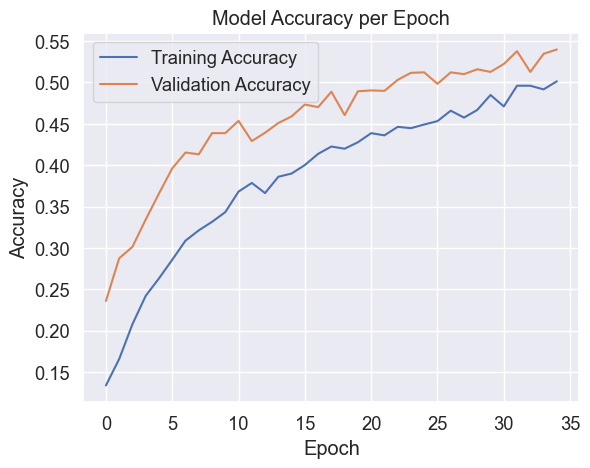

In [96]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [97]:
previsoesRNN = model.predict(X_test)
previsoesRNNval = model.predict(X_val)

59/59 ━━━━━━━━━━━━━━━━━━━━ 7s 95ms/step
59/59 ━━━━━━━━━━━━━━━━━━━━ 5s 78ms/step


In [98]:
previsoesRNN2 = np.argmax(previsoesRNN, axis=1)
previsoesRNNval2 = np.argmax(previsoesRNNval, axis=1)

In [99]:
train_loss, train_accuracy = model.evaluate(X_train, y_train_cat)
test_loss, test_accuracy = model.evaluate(X_test, y_test_cat)
val_loss, val_accuracy = model.evaluate(X_val, y_val_cat)

177/177 ━━━━━━━━━━━━━━━━━━━━ 14s 78ms/step - accuracy: 0.5946 - loss: 1.0296
59/59 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - accuracy: 0.5202 - loss: 1.2329
59/59 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - accuracy: 0.5193 - loss: 1.2276


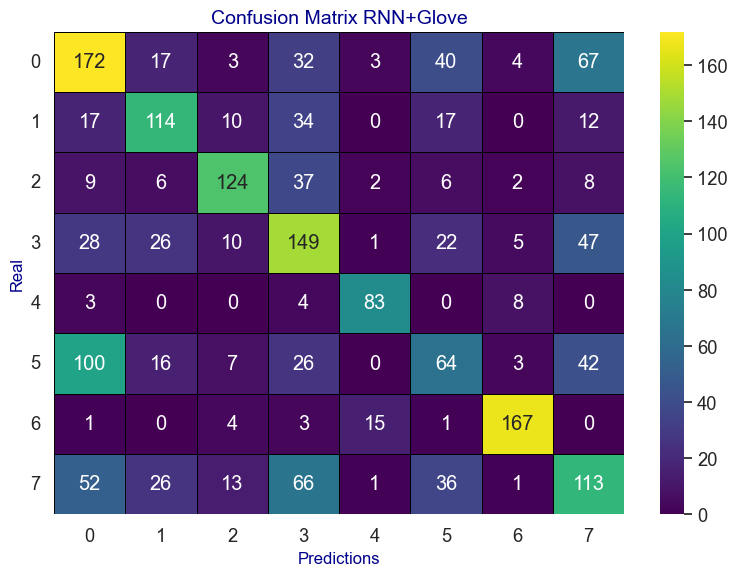

In [100]:
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(confusion_matrix(y_test, previsoesRNN2), annot=True, fmt='d', cmap='viridis',
            linewidths=0.5, linecolor='black', cbar=True)
plt.title('Confusion Matrix RNN+Glove', fontsize=14, color='darkblue')
plt.xlabel('Predictions', fontsize=12, color='darkblue')
plt.ylabel('Real', fontsize=12, color='darkblue')
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [101]:
classes = np.unique(y)
print(classification_report(y_test.tolist(), previsoesRNN2.tolist(), labels=classes.tolist()))

              precision    recall  f1-score   support

           0       0.45      0.51      0.48       338
           1       0.56      0.56      0.56       204
           2       0.73      0.64      0.68       194
           3       0.42      0.52      0.47       288
           4       0.79      0.85      0.82        98
           5       0.34      0.25      0.29       258
           6       0.88      0.87      0.88       191
           7       0.39      0.37      0.38       308

    accuracy                           0.52      1879
   macro avg       0.57      0.57      0.57      1879
weighted avg       0.52      0.52      0.52      1879



In [102]:
resultados = avaliar_modelo(y_test, previsoesRNN2, y_val, previsoesRNNval2)
resultados

,Accuracy,F1-Score,Recall,Precision
Teste,0.5247,0.5215,0.5247,0.5232
Validação,0.5378,0.5346,0.5378,0.5349


## Roberta

In [20]:
text_columns = ['cleaned_text', 'enriched', 'tokens', 'pos_tags', 'entities','Text', 'sentiment']
data['text'] = data[text_columns].astype(str).apply(lambda row: ' '.join(row.values), axis=1)

In [21]:
df = pd.DataFrame({'text': data['text'], 'label': data['Emotion_num']})
df = df[df['text'].str.strip() != ""]

In [22]:
train_texts, temp_texts, train_labels, temp_labels = train_test_split(
    df['text'].tolist(), df['label'].tolist(), test_size=0.2, stratify=df['label'], random_state=42)
val_texts, test_texts, val_labels, test_labels = train_test_split(
    temp_texts, temp_labels, test_size=0.5, stratify=temp_labels, random_state=42)

In [23]:
tokenizer = RobertaTokenizerFast.from_pretrained('roberta-large')
train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=128)
val_encodings = tokenizer(val_texts, truncation=True, padding=True, max_length=128)
test_encodings = tokenizer(test_texts, truncation=True, padding=True, max_length=128)


In [49]:
train_dataset = Dataset.from_dict({
    'input_ids': train_encodings['input_ids'],
    'attention_mask': train_encodings['attention_mask'],
    'labels': train_labels
})
val_dataset = Dataset.from_dict({
    'input_ids': val_encodings['input_ids'],
    'attention_mask': val_encodings['attention_mask'],
    'labels': val_labels
})
test_dataset = Dataset.from_dict({
    'input_ids': test_encodings['input_ids'],
    'attention_mask': test_encodings['attention_mask'],
    'labels': test_labels
})

In [50]:
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(train_labels), y=train_labels)
class_weights = dict(enumerate(class_weights))

In [17]:
weights = torch.tensor(list(class_weights.values()), dtype=torch.float).to(device)
loss_fct = nn.CrossEntropyLoss(weight=weights)
class WeightedTrainer(Trainer):
    def compute_loss(self, model, inputs, return_outputs=False, **kwargs):
        labels = inputs.pop("labels")
        outputs = model(**inputs)
        logits = outputs.logits
        loss = loss_fct(logits, labels)
        return (loss, outputs) if return_outputs else loss

In [18]:
model = RobertaForSequenceClassification.from_pretrained('roberta-large', num_labels=8)
temp_output_dir = tempfile.mkdtemp()
training_args = TrainingArguments(
    output_dir=tempfile.mkdtemp(),
    evaluation_strategy="epoch",
    save_strategy="epoch",
    num_train_epochs=30,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    learning_rate=1e-5,
    weight_decay=1e-3,
    warmup_steps=100, #começa mais suave
    load_best_model_at_end=True,
    metric_for_best_model="f1"
)
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = logits.argmax(axis=-1)
    return {'accuracy': accuracy_score(labels, preds),'f1': f1_score(labels, preds, average='weighted')}
trainer = WeightedTrainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=3)]
)

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-large and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
C:\Users\garci\AppData\Roaming\Python\Python312\site-packages\transformers\training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [19]:
trainer.train()

  0%|          | 0/14100 [00:00<?, ?it/s]

  0%|          | 0/59 [00:00<?, ?it/s]

{'eval_loss': 1.0195475816726685, 'eval_accuracy': 0.6336528221512248, 'eval_f1': 0.6357607108953267, 'eval_runtime': 40.6759, 'eval_samples_per_second': 23.085, 'eval_steps_per_second': 1.45, 'epoch': 1.0}
{'loss': 1.4606, 'grad_norm': 18.71755027770996, 'learning_rate': 9.714285714285715e-06, 'epoch': 1.06}


  0%|          | 0/59 [00:00<?, ?it/s]

{'eval_loss': 0.9329907894134521, 'eval_accuracy': 0.6389776357827476, 'eval_f1': 0.6359321578051065, 'eval_runtime': 40.3336, 'eval_samples_per_second': 23.281, 'eval_steps_per_second': 1.463, 'epoch': 2.0}
{'loss': 0.8327, 'grad_norm': 16.729347229003906, 'learning_rate': 9.357142857142859e-06, 'epoch': 2.13}


  0%|          | 0/59 [00:00<?, ?it/s]

{'eval_loss': 0.9031679630279541, 'eval_accuracy': 0.6719914802981896, 'eval_f1': 0.6706687708501685, 'eval_runtime': 40.3011, 'eval_samples_per_second': 23.3, 'eval_steps_per_second': 1.464, 'epoch': 3.0}
{'loss': 0.5893, 'grad_norm': 6.60833740234375, 'learning_rate': 9e-06, 'epoch': 3.19}


  0%|          | 0/59 [00:00<?, ?it/s]

{'eval_loss': 1.0200895071029663, 'eval_accuracy': 0.65814696485623, 'eval_f1': 0.6595013694590833, 'eval_runtime': 40.3388, 'eval_samples_per_second': 23.278, 'eval_steps_per_second': 1.463, 'epoch': 4.0}
{'loss': 0.3821, 'grad_norm': 10.532818794250488, 'learning_rate': 8.642857142857144e-06, 'epoch': 4.26}


  0%|          | 0/59 [00:00<?, ?it/s]

{'eval_loss': 1.2463377714157104, 'eval_accuracy': 0.6602768903088392, 'eval_f1': 0.6595751895697809, 'eval_runtime': 40.3469, 'eval_samples_per_second': 23.273, 'eval_steps_per_second': 1.462, 'epoch': 5.0}
{'loss': 0.2243, 'grad_norm': 7.996679782867432, 'learning_rate': 8.285714285714287e-06, 'epoch': 5.32}


  0%|          | 0/59 [00:00<?, ?it/s]

{'eval_loss': 1.4350436925888062, 'eval_accuracy': 0.6645367412140575, 'eval_f1': 0.6660229481125863, 'eval_runtime': 40.3482, 'eval_samples_per_second': 23.272, 'eval_steps_per_second': 1.462, 'epoch': 6.0}
{'train_runtime': 41149.6029, 'train_samples_per_second': 5.477, 'train_steps_per_second': 0.343, 'train_loss': 0.6371852279554867, 'epoch': 6.0}


TrainOutput(global_step=2820, training_loss=0.6371852279554867, metrics={'train_runtime': 41149.6029, 'train_samples_per_second': 5.477, 'train_steps_per_second': 0.343, 'total_flos': 1.0501215486050304e+16, 'train_loss': 0.6371852279554867, 'epoch': 6.0})

In [20]:
trainer.evaluate()

  0%|          | 0/59 [00:00<?, ?it/s]

{'eval_loss': 0.9031679630279541,
 'eval_accuracy': 0.6719914802981896,
 'eval_f1': 0.6706687708501685,
 'eval_runtime': 76.0174,
 'eval_samples_per_second': 12.352,
 'eval_steps_per_second': 0.776,
 'epoch': 6.0}

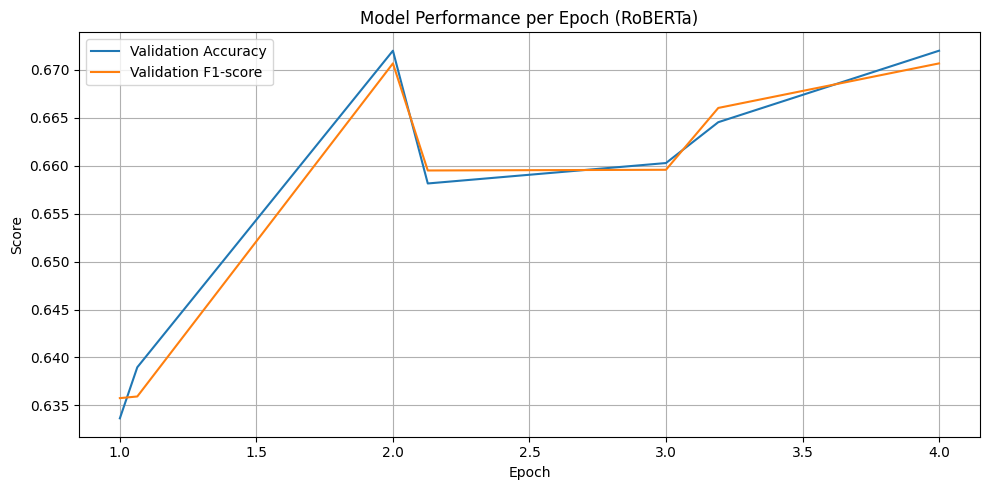

In [21]:
logs = trainer.state.log_history
epochs = []
train_acc = []
val_acc = []
val_f1 = []
for log in logs:
    if 'epoch' in log:
        epochs.append(log['epoch'])
        if 'eval_accuracy' in log:
            val_acc.append(log['eval_accuracy'])
        if 'eval_f1' in log:
            val_f1.append(log['eval_f1'])
        if 'accuracy' in log:
            train_acc.append(log['accuracy'])
plt.figure(figsize=(10, 5))
plt.plot(epochs[:len(val_acc)], val_acc, label='Validation Accuracy')
if train_acc:
    plt.plot(epochs[:len(train_acc)], train_acc, label='Training Accuracy')
plt.plot(epochs[:len(val_f1)], val_f1, label='Validation F1-score')
plt.title('Model Performance per Epoch (RoBERTa)')
plt.xlabel('Epoch')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [22]:
trainer.model.save_pretrained("Parte1/EmotionFromText/modelo_roberta_final_Plutchik")
tokenizer.save_pretrained("Parte1/EmotionFromText/tokenizer_modelo_roberta_final_Plutchik")

('Parte1/EmotionFromText/tokenizer_modelo_roberta_final_Plutchik\\tokenizer_config.json',
 'Parte1/EmotionFromText/tokenizer_modelo_roberta_final_Plutchik\\special_tokens_map.json',
 'Parte1/EmotionFromText/tokenizer_modelo_roberta_final_Plutchik\\vocab.json',
 'Parte1/EmotionFromText/tokenizer_modelo_roberta_final_Plutchik\\merges.txt',
 'Parte1/EmotionFromText/tokenizer_modelo_roberta_final_Plutchik\\added_tokens.json',
 'Parte1/EmotionFromText/tokenizer_modelo_roberta_final_Plutchik\\tokenizer.json')

In [24]:
model= RobertaForSequenceClassification.from_pretrained("Parte1//EmotionFromText//modelo_roberta_final_Plutchik", num_labels=8)
tokenizer= RobertaTokenizerFast.from_pretrained("Parte1//EmotionFromText//tokenizer_modelo_roberta_final_Plutchik")
model.eval()
model = model.to(device)

In [25]:
pred_train = trainer.predict(train_dataset)
pred_val = trainer.predict(val_dataset)
pred_test = trainer.predict(test_dataset)

  0%|          | 0/470 [00:00<?, ?it/s]

  0%|          | 0/59 [00:00<?, ?it/s]

  0%|          | 0/59 [00:00<?, ?it/s]

In [26]:
y_test = pred_test.label_ids
y_pred_test = pred_test.predictions.argmax(axis=1)
y_val = pred_val.label_ids
y_pred_val = pred_val.predictions.argmax(axis=1)
resultados = avaliar_modelo(y_test, y_pred_test, y_val, y_pred_val)
resultados

,Accuracy,F1-Score,Recall,Precision
Teste,0.6628,0.6631,0.6628,0.6764
Validação,0.6720,0.6707,0.6720,0.6787


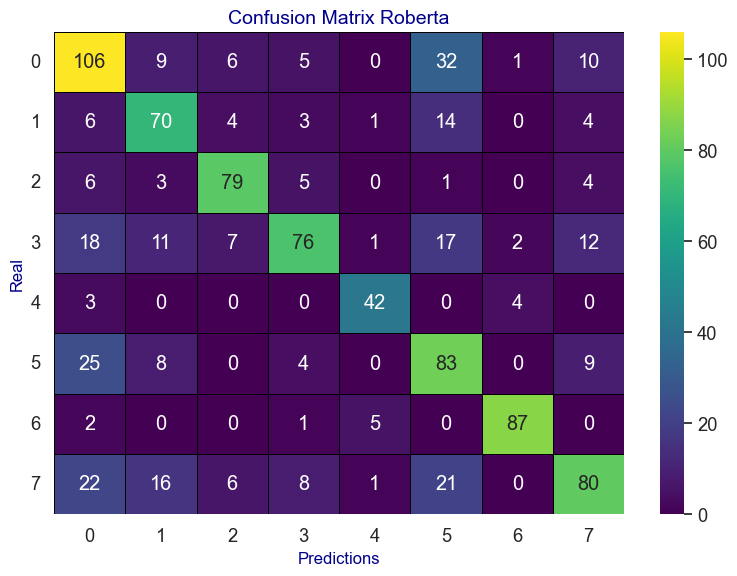

In [27]:
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, fmt='d', cmap='viridis',
            linewidths=0.5, linecolor='black', cbar=True)

plt.title('Confusion Matrix Roberta', fontsize=14, color='darkblue')
plt.xlabel('Predictions', fontsize=12, color='darkblue')
plt.ylabel('Real', fontsize=12, color='darkblue')
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

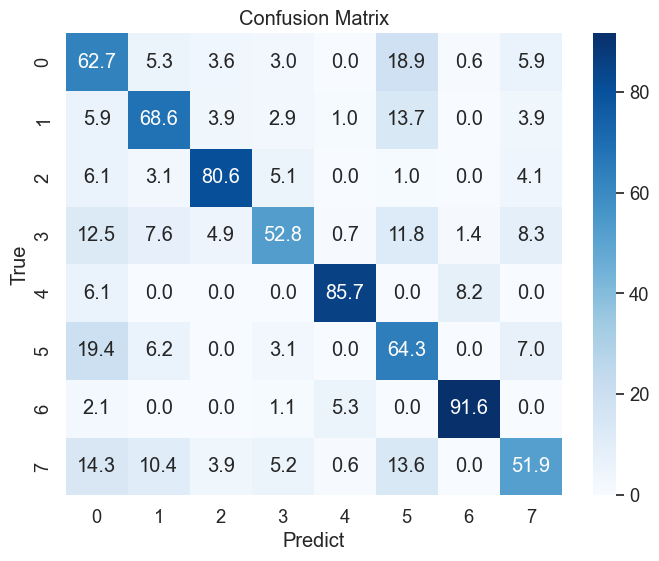

In [35]:
cm = confusion_matrix(y_test, y_pred_test)
cm_pct = cm.astype(float) / cm.sum(axis=1)[:, None] * 100
plt.figure(figsize=(8, 6))
sns.heatmap(cm_pct, annot=True, fmt=".1f", cmap="Blues")
plt.xlabel("Predict")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [29]:
emocoeslist = {"Sadness":0, "Happiness":1, "Anger":3, "Fear":4}
classes_desejadas = list(emocoeslist.values())
indices_filtrados = [i for i, y in enumerate(y_test) if y in classes_desejadas]
y_test_filtrado = [y_test[i] for i in indices_filtrados]
y_pred_filtrado = [y_pred_test[i] for i in indices_filtrados]

In [30]:
classes_desejadas = {0, 1, 3, 4}
indices_filtrados = [i for i, y in enumerate(y_test) if y in classes_desejadas and y_pred_test[i] in classes_desejadas]
y_test_filtrado = [y_test[i] for i in indices_filtrados]
y_pred_filtrado = [y_pred_test[i] for i in indices_filtrados]


In [31]:
classes_desejadas = {0, 1, 3, 4}
indices_val = [i for i, y in enumerate(y_val) if y in classes_desejadas and y_pred_val[i] in classes_desejadas]
y_val_filtrado = [y_val[i] for i in indices_val]
y_pred_val_filtrado = [y_pred_val[i] for i in indices_val]

In [32]:
acc_4classes = accuracy_score(y_test_filtrado, y_pred_filtrado)
print(f"Accuracy real para 4 emoções: {acc_4classes:.4f}")


Accuracy real para 4 emoções: 0.8376


In [33]:
avaliar_modelo(y_test_filtrado, y_pred_filtrado, y_val_filtrado, y_pred_val_filtrado)

,Accuracy,F1-Score,Recall,Precision
Teste,0.8376,0.8368,0.8376,0.8454
Validação,0.8352,0.8332,0.8352,0.8331


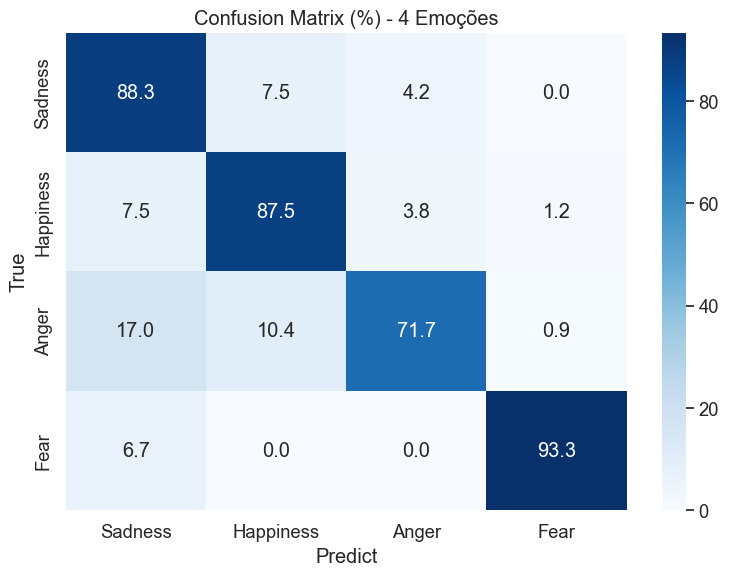

In [38]:
cm = confusion_matrix(y_test_filtrado, y_pred_filtrado, labels=sorted(list(classes_desejadas)))
cm_pct = cm.astype(float) / cm.sum(axis=1)[:, None] * 100
label_names = [k for k, v in emocoeslist.items()]
plt.figure(figsize=(8, 6))
sns.heatmap(cm_pct, annot=True, fmt=".1f", cmap="Blues", xticklabels=label_names, yticklabels=label_names)
plt.xlabel("Predict")
plt.ylabel("True")
plt.title("Confusion Matrix (%) - 4 Emoções")
plt.tight_layout()
plt.show()

## DistilBERT

In [39]:
text_columns = ['cleaned_text', 'enriched', 'tokens', 'pos_tags', 'entities','Text', 'sentiment']
data['text'] = data[text_columns].astype(str).apply(lambda row: ' '.join(row.values), axis=1)

In [40]:
df = pd.DataFrame({'text': data['text'], 'label': data['Emotion_num']})
df = df[df['text'].str.strip() != ""]

In [41]:
train_texts, temp_texts, train_labels, temp_labels = train_test_split(
    df['text'].tolist(), df['label'].tolist(), test_size=0.2, stratify=df['label'], random_state=42)
val_texts, test_texts, val_labels, test_labels = train_test_split(
    temp_texts, temp_labels, test_size=0.5, stratify=temp_labels, random_state=42)

In [42]:
tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')
train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=128)
val_encodings = tokenizer(val_texts, truncation=True, padding=True, max_length=128)
test_encodings = tokenizer(test_texts, truncation=True, padding=True, max_length=128)

In [43]:
train_dataset = Dataset.from_dict({
    'input_ids': train_encodings['input_ids'],
    'attention_mask': train_encodings['attention_mask'],
    'labels': train_labels
})
val_dataset = Dataset.from_dict({
    'input_ids': val_encodings['input_ids'],
    'attention_mask': val_encodings['attention_mask'],
    'labels': val_labels
})
test_dataset = Dataset.from_dict({
    'input_ids': test_encodings['input_ids'],
    'attention_mask': test_encodings['attention_mask'],
    'labels': test_labels
})

In [44]:
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(train_labels), y=train_labels)
class_weights = dict(enumerate(class_weights))

In [45]:
weights = torch.tensor(list(class_weights.values()), dtype=torch.float).to(device)
loss_fct = nn.CrossEntropyLoss(weight=weights)
class WeightedTrainer(Trainer):
    def compute_loss(self, model, inputs, return_outputs=False, **kwargs):
        labels = inputs.pop("labels")
        outputs = model(**inputs)
        logits = outputs.logits
        loss = loss_fct(logits, labels)
        return (loss, outputs) if return_outputs else loss

In [46]:
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=8)
temp_output_dir = tempfile.mkdtemp()
training_args = TrainingArguments(
    output_dir=tempfile.mkdtemp(),
    evaluation_strategy="epoch",
    save_strategy="epoch",
    num_train_epochs=30,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    learning_rate=2e-5,
    weight_decay=1e-3,
    load_best_model_at_end=True,
    metric_for_best_model="f1"
)
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = logits.argmax(axis=-1)
    return {
        'accuracy': accuracy_score(labels, preds),
        'f1': f1_score(labels, preds, average='weighted')
    }
trainer = WeightedTrainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=3)]
)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
C:\Users\garci\AppData\Roaming\Python\Python312\site-packages\transformers\training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [47]:
trainer.train()

  0%|          | 0/14100 [00:00<?, ?it/s]

  0%|          | 0/59 [00:00<?, ?it/s]

{'eval_loss': 1.1047565937042236, 'eval_accuracy': 0.5580404685835996, 'eval_f1': 0.558178014658029, 'eval_runtime': 2.732, 'eval_samples_per_second': 343.7, 'eval_steps_per_second': 21.596, 'epoch': 1.0}
{'loss': 1.3704, 'grad_norm': 5.114035606384277, 'learning_rate': 1.929078014184397e-05, 'epoch': 1.06}


  0%|          | 0/59 [00:00<?, ?it/s]

{'eval_loss': 1.018802285194397, 'eval_accuracy': 0.5867944621938233, 'eval_f1': 0.5773163187281816, 'eval_runtime': 2.841, 'eval_samples_per_second': 330.515, 'eval_steps_per_second': 20.767, 'epoch': 2.0}
{'loss': 0.8874, 'grad_norm': 7.922885417938232, 'learning_rate': 1.8581560283687945e-05, 'epoch': 2.13}


  0%|          | 0/59 [00:00<?, ?it/s]

{'eval_loss': 1.045475721359253, 'eval_accuracy': 0.6134185303514377, 'eval_f1': 0.6092401314700185, 'eval_runtime': 3.0546, 'eval_samples_per_second': 307.401, 'eval_steps_per_second': 19.315, 'epoch': 3.0}
{'loss': 0.6157, 'grad_norm': 7.52824592590332, 'learning_rate': 1.7872340425531915e-05, 'epoch': 3.19}


  0%|          | 0/59 [00:00<?, ?it/s]

{'eval_loss': 1.1912603378295898, 'eval_accuracy': 0.5942492012779552, 'eval_f1': 0.5915885559048778, 'eval_runtime': 3.1789, 'eval_samples_per_second': 295.386, 'eval_steps_per_second': 18.56, 'epoch': 4.0}
{'loss': 0.3983, 'grad_norm': 7.691441059112549, 'learning_rate': 1.716312056737589e-05, 'epoch': 4.26}


  0%|          | 0/59 [00:00<?, ?it/s]

{'eval_loss': 1.3928451538085938, 'eval_accuracy': 0.6059637912673056, 'eval_f1': 0.6069368641851306, 'eval_runtime': 3.0562, 'eval_samples_per_second': 307.247, 'eval_steps_per_second': 19.305, 'epoch': 5.0}
{'loss': 0.2201, 'grad_norm': 6.593748092651367, 'learning_rate': 1.645390070921986e-05, 'epoch': 5.32}


  0%|          | 0/59 [00:00<?, ?it/s]

{'eval_loss': 1.5799213647842407, 'eval_accuracy': 0.6027689030883919, 'eval_f1': 0.6017799352579541, 'eval_runtime': 3.0275, 'eval_samples_per_second': 310.162, 'eval_steps_per_second': 19.488, 'epoch': 6.0}
{'train_runtime': 496.3308, 'train_samples_per_second': 454.052, 'train_steps_per_second': 28.408, 'train_loss': 0.6373950674178752, 'epoch': 6.0}


TrainOutput(global_step=2820, training_loss=0.6373950674178752, metrics={'train_runtime': 496.3308, 'train_samples_per_second': 454.052, 'train_steps_per_second': 28.408, 'total_flos': 1492802363031552.0, 'train_loss': 0.6373950674178752, 'epoch': 6.0})

In [48]:
trainer.evaluate()

  0%|          | 0/59 [00:00<?, ?it/s]

{'eval_loss': 1.045475721359253,
 'eval_accuracy': 0.6134185303514377,
 'eval_f1': 0.6092401314700185,
 'eval_runtime': 3.488,
 'eval_samples_per_second': 269.208,
 'eval_steps_per_second': 16.915,
 'epoch': 6.0}

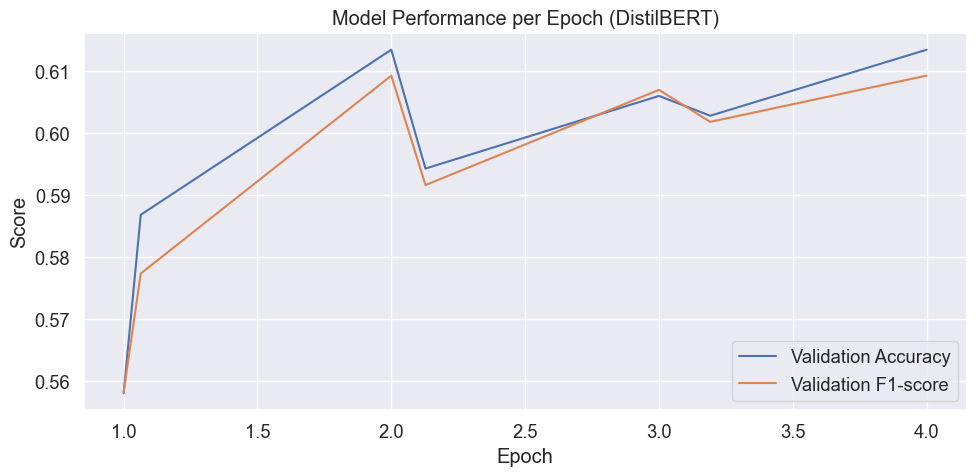

In [49]:
logs = trainer.state.log_history
epochs = []
train_acc = []
val_acc = []
val_f1 = []
for log in logs:
    if 'epoch' in log:
        epochs.append(log['epoch'])
        if 'eval_accuracy' in log:
            val_acc.append(log['eval_accuracy'])
        if 'eval_f1' in log:
            val_f1.append(log['eval_f1'])
        if 'accuracy' in log:
            train_acc.append(log['accuracy'])
plt.figure(figsize=(10, 5))
plt.plot(epochs[:len(val_acc)], val_acc, label='Validation Accuracy')
if train_acc:
    plt.plot(epochs[:len(train_acc)], train_acc, label='Training Accuracy')
plt.plot(epochs[:len(val_f1)], val_f1, label='Validation F1-score')
plt.title('Model Performance per Epoch (DistilBERT)')
plt.xlabel('Epoch')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [50]:
trainer.model.save_pretrained("Parte1//EmotionFromText//modelo_distilbert_Plutchik_final")
tokenizer.save_pretrained("Parte1//EmotionFromText//tokenizer_modelo_distilbert_Plutchik_final")

('Parte1//EmotionFromText//tokenizer_modelo_distilbert_Plutchik_final\\tokenizer_config.json',
 'Parte1//EmotionFromText//tokenizer_modelo_distilbert_Plutchik_final\\special_tokens_map.json',
 'Parte1//EmotionFromText//tokenizer_modelo_distilbert_Plutchik_final\\vocab.txt',
 'Parte1//EmotionFromText//tokenizer_modelo_distilbert_Plutchik_final\\added_tokens.json',
 'Parte1//EmotionFromText//tokenizer_modelo_distilbert_Plutchik_final\\tokenizer.json')

In [51]:
pred_train = trainer.predict(train_dataset)
pred_val = trainer.predict(val_dataset)
pred_test = trainer.predict(test_dataset)

  0%|          | 0/470 [00:00<?, ?it/s]

  0%|          | 0/59 [00:00<?, ?it/s]

  0%|          | 0/59 [00:00<?, ?it/s]

In [52]:
y_test = pred_test.label_ids
y_pred_test = pred_test.predictions.argmax(axis=1)
y_val = pred_val.label_ids
y_pred_val = pred_val.predictions.argmax(axis=1)
resultados = avaliar_modelo(y_test, y_pred_test, y_val, y_pred_val)
resultados

,Accuracy,F1-Score,Recall,Precision
Teste,0.6138,0.6084,0.6138,0.6216
Validação,0.6134,0.6092,0.6134,0.6243


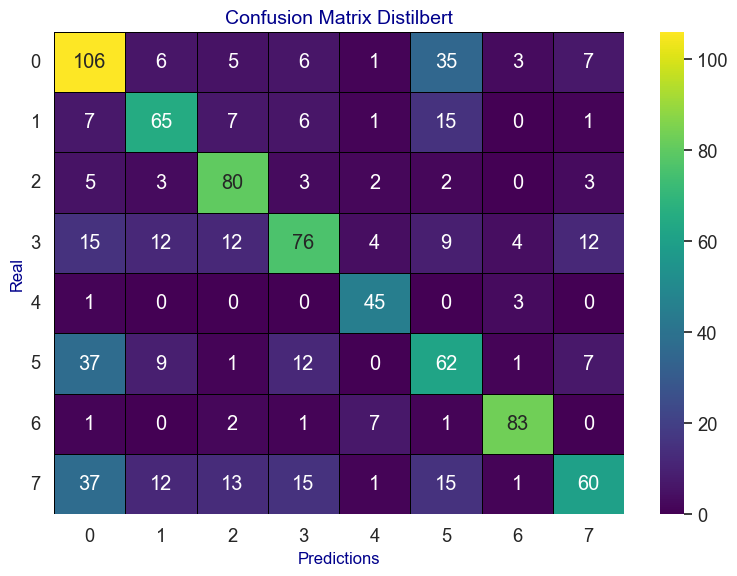

In [53]:
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, fmt='d', cmap='viridis',
            linewidths=0.5, linecolor='black', cbar=True)

plt.title('Confusion Matrix Distilbert', fontsize=14, color='darkblue')
plt.xlabel('Predictions', fontsize=12, color='darkblue')
plt.ylabel('Real', fontsize=12, color='darkblue')
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## Combined Emotions

In [24]:
model= RobertaForSequenceClassification.from_pretrained("Parte1//EmotionFromText//modelo_roberta_final_Plutchik", num_labels=8)
tokenizer= RobertaTokenizerFast.from_pretrained("Parte1//EmotionFromText//tokenizer_modelo_roberta_final_Plutchik")
model.eval()
model = model.to(device)

In [ ]:
id2label = {0: "Joy", 1: "Disgust", 2: "Anger", 3: "Fear", 4: "Trust", 5: "Surprise", 6: "Anticipation", 7: "Sadness"}

In [113]:
combined_emotions_map = {
    tuple(sorted(["Anticipation", "Joy"])): "Optimism",
    tuple(sorted(["Joy", "Anticipation"])): "Optimism",
    tuple(sorted(["Joy", "Trust"])): "Love",
    tuple(sorted(["Trust", "Joy"])): "Love",
    tuple(sorted(["Trust", "Fear"])): "Love",
    tuple(sorted(["Fear", "Trust"])): "Awe",
    tuple(sorted(["Fear", "Surprise"])): "Awe",
    tuple(sorted(["Surprise", "Fear"])): "Awe",
    tuple(sorted(["Surprise", "Sadness"])): "Awe",
    tuple(sorted(["Sadness", "Surprise"])): "Remorse",
    tuple(sorted(["Disgust", "Sadness"])): "Remorse",
    tuple(sorted(["Sadness", "Disgust"])): "Remorse",
    tuple(sorted(["Anger", "Disgust"])): "Contempt",
    tuple(sorted(["Disgust", "Anger"])): "Contempt",
    tuple(sorted(["Anger", "Anticipation"])): "Contempt",
    tuple(sorted(["Anticipation", "Anger"])): "Optimism"
}

In [114]:
import torch.nn.functional as F
import itertools

def predict_combined_emotion2(row, model, tokenizer, device="cuda", dominant_threshold=0.819149706225117):
    if isinstance(row, pd.Series):
        text = ' '.join(str(row[col]) for col in ['Text', 'enriched', 'entities', 'cleaned_text', 'pos_tags', 'tokens', 'sentiment'] if col in row)
    else:
        text = str(row)
    model.eval()
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True).to(device)
    with torch.no_grad():
        outputs = model(**inputs)
        probs = F.softmax(outputs.logits, dim=-1).squeeze().cpu().numpy()
    top_indices = probs.argsort()[::-1]
    top_labels = [id2label[i] for i in top_indices]
    if probs[top_indices[0]] >= dominant_threshold:
        return top_labels[0]
    for j in range(1, len(top_labels)):
        pair = tuple(sorted((top_labels[0], top_labels[j])))
        if pair in combined_emotions_map:
            return combined_emotions_map[pair]
    return top_labels[0]



In [28]:
import optuna
from sklearn.metrics import f1_score
from tqdm import tqdm

def objective(trial):
    dominant_threshold = trial.suggest_float("dominant_threshold", 0.5, 0.95)
    preds = []
    for _, row in tqdm(df.iterrows(), total=len(df), desc=f"Threshold {dominant_threshold:.2f}"):
        pred = predict_combined_emotion2(row, model, tokenizer, device=device, dominant_threshold=dominant_threshold)
        preds.append(pred)
    true_labels = df["label"].tolist()
    if len(preds) != len(true_labels):
        raise ValueError(f"Prediction length mismatch: {len(preds)} vs {len(true_labels)}")

    return f1_score(true_labels, preds, average="weighted")

In [83]:
combined_emotions_map2 = {
    tuple(sorted(["Anticipation", "Joy"])): "Optimism",
    tuple(sorted(["Joy", "Anticipation"])): "Optimism",
    tuple(sorted(["Joy", "Trust"])): "Love",
    tuple(sorted(["Trust", "Joy"])): "Love",
    tuple(sorted(["Trust", "Fear"])): "Love",
    tuple(sorted(["Fear", "Trust"])): "Awe",
    tuple(sorted(["Fear", "Surprise"])): "Awe",
    tuple(sorted(["Surprise", "Fear"])): "Awe",
    tuple(sorted(["Surprise", "Sadness"])): "Awe",
    tuple(sorted(["Sadness", "Surprise"])): "Remorse",
    tuple(sorted(["Disgust", "Sadness"])): "Remorse",
    tuple(sorted(["Sadness", "Disgust"])): "Remorse",
    tuple(sorted(["Anger", "Disgust"])): "Contempt",
    tuple(sorted(["Disgust", "Anger"])): "Contempt",
    tuple(sorted(["Anger", "Anticipation"])): "Contempt",
    tuple(sorted(["Anticipation", "Anger"])): "Optimism"
}

In [84]:
import torch.nn.functional as F
import itertools

def predict_combined_emotion(row, model, tokenizer, device="cuda", top_n=8):
    if isinstance(row, pd.Series):
        text = ' '.join(str(row[col]) for col in ['Text', 'enriched', 'entities', "cleaned_text", 'pos_tags', 'tokens', "sentiment"] if col in row)
    else:
        text = str(row)

    model.eval()
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True).to(device)
    with torch.no_grad():
        outputs = model(**inputs)
        probs = F.softmax(outputs.logits, dim=-1).squeeze().cpu().numpy()

    top_indices = probs.argsort()[-top_n:][::-1]
    top_labels = [id2label[i] for i in top_indices]

    dominant = top_labels[0]

    for other_label in top_labels[1:]:
        pair = tuple(sorted((dominant, other_label)))
        if pair in combined_emotions_map2:
            return combined_emotions_map2[pair]

    return "Remorse"



### 8 Principal Emotions

In [54]:
data2 = pd.read_csv(r"Dataset\AffectAlchemytest2.csv", encoding='ISO-8859-1')
data2

,Text,Emotion,en
0,Each day brought with it new challenges as the...,Grief,en
1,Each day brought with it new challenges as the...,Grief,en
2,Each day brought with it new challenges as the...,Grief,en
3,Each day felt heavier than the last as they st...,Grief,en
4,"Every corner of the room reminded him of her,...",Grief,en
...,...,...,...
20070,"So all the m&m's eaten, house neatly decorated...",Surprise,en
20071,"Son is back home, I still have to wrap a prese...",Surprise,en
20072,Son made a super cool one. Can't put it on Twi...,Surprise,en
20073,"So the Sinterklaas presents have been bought, ...",Surprise,en


In [55]:
data2["Emotion"].value_counts()

Emotion
Joy                1723
Sad                1577
Fear               1490
Happy              1324
Surprise           1297
Neutral            1214
Peace              1132
Determination      1058
Anger              1043
Gratitude          1030
Disgust            1028
Contempt           1011
Love               1005
Anticipation        969
Awe                 969
Optimism            759
Trust               625
Shame               572
Grief               233
sadness               3
love                  3
Shame, Sad            2
Gratitude, Love       2
fear                  2
surprise              2
Peace, Joy            1
Shame, Fear           1
Name: count, dtype: int64

In [56]:
data2.loc[:,'Emotion'] = data2['Emotion'].replace({'Sad': 'Sadness', 'sadness': 'Sadness',
                                           'Fear': 'Fear', 'fear': 'Fear', 'Happy': 'Happiness',
                                           'Surprise': 'Surprise', 'surprise': 'Surprise', "love": "Love", "Remorse, Sad":"Remorse",
                                           "Shame, Fear":"Remorse", "Peace, Joy":"Joy", "Shame, Sad":"Remorse","Gratitude, Love":"Love", "Shame":"Remorse"})
data2["Emotion"].value_counts()

Emotion
Joy              1724
Sadness          1580
Fear             1492
Happiness        1324
Surprise         1299
Neutral          1214
Peace            1132
Determination    1058
Anger            1043
Gratitude        1030
Disgust          1028
Contempt         1011
Love             1010
Anticipation      969
Awe               969
Optimism          759
Trust             625
Remorse           575
Grief             233
Name: count, dtype: int64

In [57]:
emocoeslist = {"Love", "Awe", "Remorse", "Contempt", "Optimism"}
data2 = data2[data2['Emotion'].isin(emocoeslist)]
data2["Emotion"].value_counts()

Emotion
Contempt    1011
Love        1010
Awe          969
Optimism     759
Remorse      575
Name: count, dtype: int64

In [58]:
data=data2
nlp = spacy.load("en_core_web_lg")
stop_words = set(stopwords.words('english'))
tqdm.pandas()
data['enriched'] = data['Text'].progress_apply(enrich_text_pipeline)
data['cleaned_text'] = data['enriched'].apply(lambda x: x['text'])
data['sentiment'] = data['enriched'].apply(lambda x: x['sentiment'])
data['entities'] = data['enriched'].apply(lambda x: x['ner'])
data['pos_tags'] = data['enriched'].apply(lambda x: x['pos'])
data.loc[:, 'cleaned_text'] = data['cleaned_text'].apply(substituir_emojis)
data.loc[:, 'cleaned_text'] = data['cleaned_text'].apply(lambda x: contractions.fix(x))
data.loc[:, 'cleaned_text'] = data['cleaned_text'].str.replace(r'\d+',  ' ', regex=True)
data.loc[:, 'cleaned_text'] = data['cleaned_text'].apply(corrigir_erros_comuns)
data.loc[:, 'cleaned_text'] = data['cleaned_text'].apply(reduce_excessive_repeats_smart)
data.loc[:, 'cleaned_text'] = data['cleaned_text'].apply(remove_repeated_words)
data.loc[:, 'cleaned_text'] = data['cleaned_text'].apply(lambda x: clean_text_spacy(x, additional_stopwords={'rt','amp', 'rhoa', 'lol', 'omfg'}))
data.loc[:, 'cleaned_text'] = remove_low_tfidf_words(data['cleaned_text'], threshold=0.01)
data.loc[:, 'cleaned_text'] = data['cleaned_text'].apply(lambda x: re.sub(f"[{re.escape(string.punctuation)}]", " ", x))
data.loc[:, 'tokens'] = data['cleaned_text'].apply(word_tokenize)
data

100%|██████████| 4324/4324 [00:33<00:00, 128.69it/s]
C:\Users\garci\AppData\Local\Temp\ipykernel_7556\3893693380.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['enriched'] = data['Text'].progress_apply(enrich_text_pipeline)
C:\Users\garci\AppData\Local\Temp\ipykernel_7556\3893693380.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cleaned_text'] = data['enriched'].apply(lambda x: x['text'])
C:\Users\garci\AppData\Local\Temp\ipykernel_7556\3893693380.py:7: SettingWithCopyWarning: 
A value 

,Text,Emotion,en,enriched,cleaned_text,sentiment,entities,pos_tags,tokens
315,""" I felt mortified , but cushioned by the drin...",Remorse,en,"{'text': 'feel mortify cushion drink', 'ner': ...",feel mortify cushion drink,0.0000,[],"[( , SPACE), (felt, VERB), (mortified, VERB), ...","[feel, mortify, cushion, drink]"
316,""" What 's this , playing infant games still ? ...",Remorse,en,{'text': 'play infant game demand gratified fl...,play infant game demand gratify flush embarras...,0.1531,"[(tristram s cheek, ORG)]","[( , SPACE), (s, PROPN), ( , SPACE), (playing,...","[play, infant, game, demand, gratify, flush, e..."
334,"""Amidst the chaos of the city, your love is my...",Love,en,"{'text': 'amidst chaos city love anchor', 'ner...",amidst chaos city love anchor,0.1280,[],"[(amidst, ADP), (chaos, NOUN), (city, NOUN), (...","[amidst, chaos, city, love, anchor]"
492,"""Being with you feels like home",Love,en,"{'text': 'feel like home', 'ner': [], 'pos': [...",feel like home,0.3612,[],"[(being, AUX), (feels, VERB), (like, ADP), (ho...","[feel, like, home]"
493,"""Being with you feels like magic",Love,en,"{'text': 'feel like magic', 'ner': [], 'pos': ...",feel like magic,0.3612,[],"[(being, AUX), (feels, VERB), (like, ADP), (ma...","[feel, like, magic]"
...,...,...,...,...,...,...,...,...,...
20039,You're the song that plays on repeat in my hea...,Love,en,"{'text': 'song plays repeat heart metaphor', '...",song plays repeat heart metaphor,0.2500,[],"[(song, NOUN), (plays, AUX), (repeat, VERB), (...","[song, plays, repeat, heart, metaphor]"
20040,You're the sun that warms my soul. (Metaphor),Love,en,"{'text': 'sun warm soul metaphor', 'ner': [], ...",sun warm soul metaphor,0.2263,[],"[(sun, PROPN), (warms, VERB), (soul, NOUN), ((...","[sun, warm, soul, metaphor]"
20041,You're the sunshine on a cloudy day. (Simile),Love,en,"{'text': 'sunshine cloudy day simile', 'ner': ...",sunshine cloudy day simile,0.4939,"[(sunshine cloudy, PERSON)]","[(sunshine, PROPN), (cloudy, ADJ), (day, NOUN)...","[sunshine, cloudy, day, simile]"
20042,You're the sunshine that breaks through my clo...,Love,en,{'text': 'sunshine break cloud light chase awa...,sunshine break cloud light chase away darkness...,0.9633,[],"[(sunshine, PROPN), (breaks, VERB), (clouds, N...","[sunshine, break, cloud, light, chase, away, d..."


In [59]:
data = data.dropna()
data = data.drop(columns=['en'])
data = data.drop_duplicates(subset='cleaned_text', keep='first').reset_index(drop=True)
data = data[data['Text'].str.split().apply(len) > 1]
data

,Text,Emotion,enriched,cleaned_text,sentiment,entities,pos_tags,tokens
0,""" I felt mortified , but cushioned by the drin...",Remorse,"{'text': 'feel mortify cushion drink', 'ner': ...",feel mortify cushion drink,0.0000,[],"[( , SPACE), (felt, VERB), (mortified, VERB), ...","[feel, mortify, cushion, drink]"
1,""" What 's this , playing infant games still ? ...",Remorse,{'text': 'play infant game demand gratified fl...,play infant game demand gratify flush embarras...,0.1531,"[(tristram s cheek, ORG)]","[( , SPACE), (s, PROPN), ( , SPACE), (playing,...","[play, infant, game, demand, gratify, flush, e..."
2,"""Amidst the chaos of the city, your love is my...",Love,"{'text': 'amidst chaos city love anchor', 'ner...",amidst chaos city love anchor,0.1280,[],"[(amidst, ADP), (chaos, NOUN), (city, NOUN), (...","[amidst, chaos, city, love, anchor]"
3,"""Being with you feels like home",Love,"{'text': 'feel like home', 'ner': [], 'pos': [...",feel like home,0.3612,[],"[(being, AUX), (feels, VERB), (like, ADP), (ho...","[feel, like, home]"
4,"""Being with you feels like magic",Love,"{'text': 'feel like magic', 'ner': [], 'pos': ...",feel like magic,0.3612,[],"[(being, AUX), (feels, VERB), (like, ADP), (ma...","[feel, like, magic]"
...,...,...,...,...,...,...,...,...
2741,You're the song that plays on repeat in my hea...,Love,"{'text': 'song plays repeat heart metaphor', '...",song plays repeat heart metaphor,0.2500,[],"[(song, NOUN), (plays, AUX), (repeat, VERB), (...","[song, plays, repeat, heart, metaphor]"
2742,You're the sun that warms my soul. (Metaphor),Love,"{'text': 'sun warm soul metaphor', 'ner': [], ...",sun warm soul metaphor,0.2263,[],"[(sun, PROPN), (warms, VERB), (soul, NOUN), ((...","[sun, warm, soul, metaphor]"
2743,You're the sunshine on a cloudy day. (Simile),Love,"{'text': 'sunshine cloudy day simile', 'ner': ...",sunshine cloudy day simile,0.4939,"[(sunshine cloudy, PERSON)]","[(sunshine, PROPN), (cloudy, ADJ), (day, NOUN)...","[sunshine, cloudy, day, simile]"
2744,You're the sunshine that breaks through my clo...,Love,{'text': 'sunshine break cloud light chase awa...,sunshine break cloud light chase away darkness...,0.9633,[],"[(sunshine, PROPN), (breaks, VERB), (clouds, N...","[sunshine, break, cloud, light, chase, away, d..."


In [60]:
for col in ['Text', 'enriched', 'entities', "cleaned_text",'pos_tags', 'tokens',"sentiment" ]:
    data[col] = data[col].apply(lambda x: " ".join(str(i) for i in x) if isinstance(x, list) else str(x))


In [61]:
y = data["Emotion"].reset_index(drop=True)
X = data.drop(columns=["Emotion"]).reset_index(drop=True)

In [62]:
X

,Text,enriched,cleaned_text,sentiment,entities,pos_tags,tokens
0,""" I felt mortified , but cushioned by the drin...","{'text': 'feel mortify cushion drink', 'ner': ...",feel mortify cushion drink,0.0,,"(' ', 'SPACE') ('felt', 'VERB') ('mortified', ...",feel mortify cushion drink
1,""" What 's this , playing infant games still ? ...",{'text': 'play infant game demand gratified fl...,play infant game demand gratify flush embarras...,0.1531,"('tristram s cheek', 'ORG')","(' ', 'SPACE') ('s', 'PROPN') (' ', 'SPACE') (...",play infant game demand gratify flush embarras...
2,"""Amidst the chaos of the city, your love is my...","{'text': 'amidst chaos city love anchor', 'ner...",amidst chaos city love anchor,0.128,,"('amidst', 'ADP') ('chaos', 'NOUN') ('city', '...",amidst chaos city love anchor
3,"""Being with you feels like home","{'text': 'feel like home', 'ner': [], 'pos': [...",feel like home,0.3612,,"('being', 'AUX') ('feels', 'VERB') ('like', 'A...",feel like home
4,"""Being with you feels like magic","{'text': 'feel like magic', 'ner': [], 'pos': ...",feel like magic,0.3612,,"('being', 'AUX') ('feels', 'VERB') ('like', 'A...",feel like magic
...,...,...,...,...,...,...,...
2741,You're the song that plays on repeat in my hea...,"{'text': 'song plays repeat heart metaphor', '...",song plays repeat heart metaphor,0.25,,"('song', 'NOUN') ('plays', 'AUX') ('repeat', '...",song plays repeat heart metaphor
2742,You're the sun that warms my soul. (Metaphor),"{'text': 'sun warm soul metaphor', 'ner': [], ...",sun warm soul metaphor,0.2263,,"('sun', 'PROPN') ('warms', 'VERB') ('soul', 'N...",sun warm soul metaphor
2743,You're the sunshine on a cloudy day. (Simile),"{'text': 'sunshine cloudy day simile', 'ner': ...",sunshine cloudy day simile,0.4939,"('sunshine cloudy', 'PERSON')","('sunshine', 'PROPN') ('cloudy', 'ADJ') ('day'...",sunshine cloudy day simile
2744,You're the sunshine that breaks through my clo...,{'text': 'sunshine break cloud light chase awa...,sunshine break cloud light chase away darkness...,0.9633,,"('sunshine', 'PROPN') ('breaks', 'VERB') ('clo...",sunshine break cloud light chase away darkness...


In [85]:
data["Predicted"] = X.apply(lambda row: predict_combined_emotion(row, model, tokenizer, device=device, top_n=8), axis=1)

In [86]:
data["Predicted"].value_counts()

Predicted
Optimism    882
Love        732
Contempt    669
Awe         244
Remorse     219
Name: count, dtype: int64

In [87]:
data["Emotion"].value_counts()

Emotion
Love        949
Remorse     567
Contempt    552
Awe         345
Optimism    333
Name: count, dtype: int64

In [88]:
y_true = data["Emotion"]
y_pred = data["Predicted"]

In [89]:
labels_unicos = sorted(y_true.unique())
cm = confusion_matrix(y_true, y_pred, labels=labels_unicos)

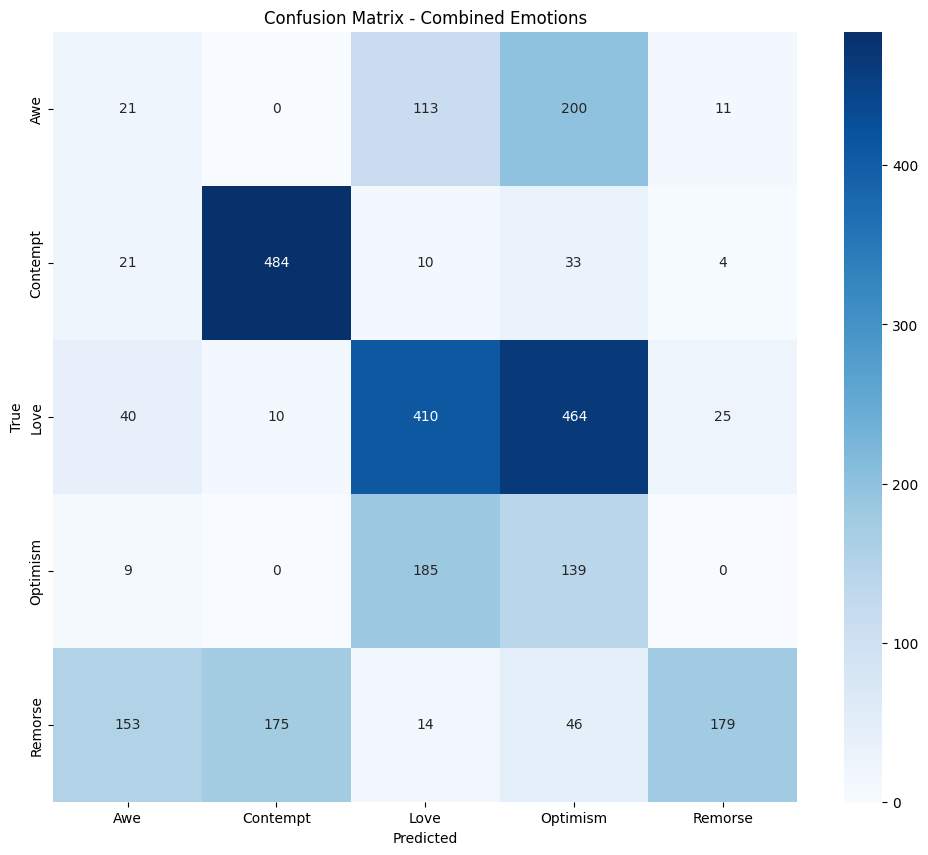

In [90]:
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=labels_unicos, yticklabels=labels_unicos, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - Combined Emotions")
plt.show()

In [91]:
resultados = avaliar_simples(y_true, y_pred)
resultados

,Accuracy,F1-Score,Recall,Precision
Teste,0.449,0.4587,0.449,0.5377


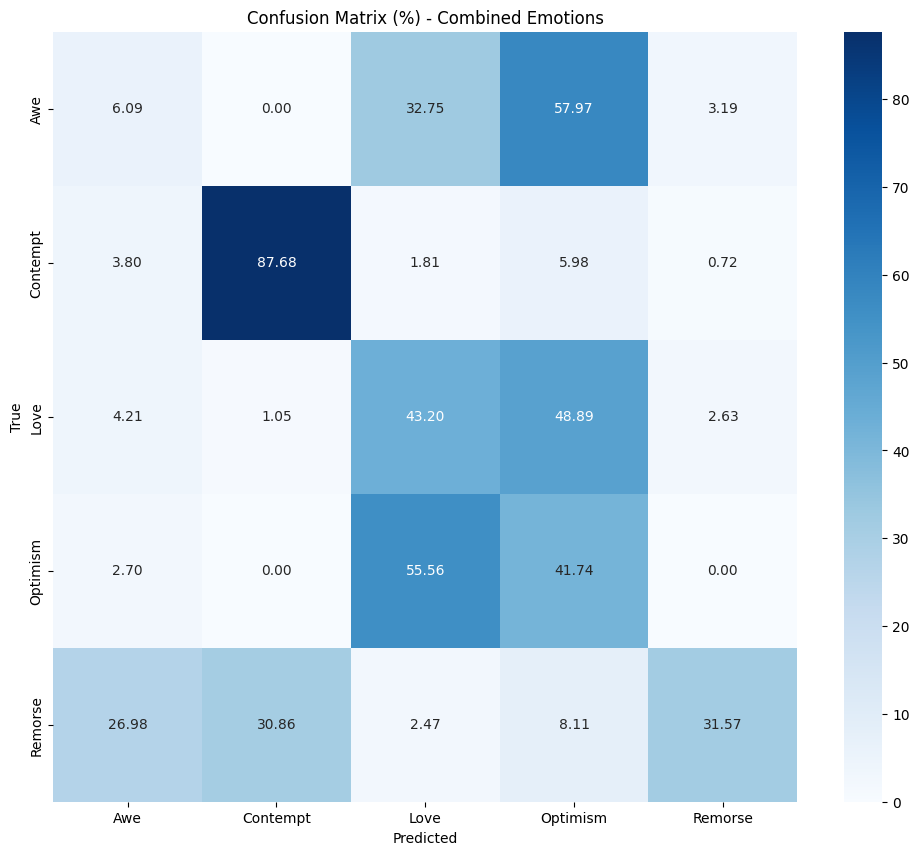

In [92]:
cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

plt.figure(figsize=(12, 10))
sns.heatmap(cm_percent, annot=True, fmt=".2f", xticklabels=labels_unicos, yticklabels=labels_unicos, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix (%) - Combined Emotions")
plt.show()